# Axialni EMM urceni hodnot parametru modelu

In [1]:
# Setup some Jupyter env features
%load_ext autoreload
%autoreload 2
%matplotlib inline

from pandas import DataFrame

In [2]:
# plot dat
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams

rcParams["font.size"] = 14
rcParams["mathtext.fontset"] = "cm"
rcParams["mathtext.rm"] = "serif"
rcParams["text.usetex"] = "true";
rc('text', usetex=True)

my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

In [3]:
# data import z 10.3.2020 
#import pandas as pd
import numpy as np

#data_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_delim.txt", sep="\t").values
#voltages_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_voltages.txt", sep="\t").values

data_bezcond_p1 = np.genfromtxt("axial_EMM_10_03_2020_part1_delim.txt", delimiter="\t")[:,:8]
voltages_bezcond_p1 = np.genfromtxt("axial_EMM_10_03_2020_part1_voltages.txt", delimiter="\t")
data_bezcond_p2 = np.genfromtxt("axial_EMM_10_03_2020_part2_delim.txt", delimiter="\t")[:,:8]
voltages_bezcond_p2 = np.genfromtxt("axial_EMM_10_03_2020_part2_voltages.txt", delimiter="\t")
data_bezcond_p3 = np.genfromtxt("axial_EMM_10_03_2020_part3_delim.txt", delimiter="\t")[:,:2]
voltages_bezcond_p3 = np.genfromtxt("axial_EMM_10_03_2020_part3_voltages.txt", delimiter="\t")

fotkor_bezcond=np.concatenate( (data_bezcond_p1 ,data_bezcond_p2, data_bezcond_p3) ,axis=1)
voltages_bezcond=np.concatenate( (voltages_bezcond_p1 ,voltages_bezcond_p2, voltages_bezcond_p3) ,axis=0)

# pomocne promene
fotkor_shape = np.shape(fotkor_bezcond)

# parametry odecitani foton-korelacnich dat
t_res = 256e-12  # casove rozliseni histogramu v s
t_measure = 150 * np.ones(fotkor_shape[1]) # doba nacitani dat v s

# casova skala foton-kor. dat
t_scale = np.array( range(0,fotkor_shape[0]) ) *t_res

#---------- background fotony
background_photocounts = 400 * np.ones(fotkor_shape[1]) # ph/s  tyto fotony jsou rovnomerne rozdeleny v prubehu RF periody
# ------------------------------
photon_sum = np.sum(fotkor_bezcond, axis=0) - np.array(t_measure) * np.array(background_photocounts)

hist_sigma = 0.09088658 * np.sqrt( photon_sum )

#------fit 
from EMM_min_func import get_hist_fit

DeltaS_S_ratio_bezcond, Delta_S_S_ratio_sigma_bezcond, fot_phi_bezcond, fot_phi_sigma_bezcond, x_bezcond, Omega_bezcond, Omega_sigma_bezcond, nu_bezcond, t_scale_bezcond = get_hist_fit(fotkor_bezcond, 
                                                                                                    voltages_bezcond, t_res, t_measure, 
                                                                                                    background_photocounts, hist_sigma, 
                                                                                                       sign_DeltaS=False, phi0=2.1)


data_cond_p1 = np.genfromtxt("axial_EMM_11_03_2020_vyvazeny_part1_delim.txt", delimiter="\t")[:,:8]
voltages_cond_p1 = np.genfromtxt("axial_EMM_11_03_2020_vyvazeny_part1_voltages.txt", delimiter="\t")
data_cond_p2 = np.genfromtxt("axial_EMM_11_03_2020_vyvazeny_part2_delim.txt", delimiter="\t")[:,:2]
voltages_cond_p2 = np.genfromtxt("axial_EMM_11_03_2020_vyvazeny_part2_voltages.txt", delimiter="\t")

fotkor_cond=np.concatenate( (data_cond_p1 ,data_cond_p2) ,axis=1)
voltages_cond=np.concatenate( (voltages_cond_p1 ,voltages_cond_p2) ,axis=0)

# pomocne promene
fotkor_cond_shape = np.shape(fotkor_cond)

# parametry odecitani foton-korelacnich dat
t_res_cond = 256e-12  # casove rozliseni histogramu v s
t_measure_cond = 100 * np.ones(fotkor_cond_shape[1]) # doba nacitani dat v s

# casova skala foton-kor. dat
t_scale_cond = np.array( range(0,fotkor_cond_shape[0]) ) *t_res_cond

#---------- odecet pozadi
background_photocounts = 1100 * np.ones(fotkor_cond_shape[1]) # ph/s  tyto fotony jsou rovnomerne rozdeleny v prubehu RF periody
# ------------------------------

# ------------------------------
photon_sum = np.sum(fotkor_cond, axis=0) - np.array(t_measure_cond) * np.array(background_photocounts)

hist_sigma = 0.09088658 * np.sqrt( photon_sum )

#------fit 
from EMM_min_func import get_hist_fit

DeltaS_S_ratio_cond, Delta_S_S_ratio_sigma_cond, fot_phi_cond, fot_phi_sigma_cond, x_cond, Omega_cond, Omega_sigma_cond, nu_cond, t_scale_cond = get_hist_fit(fotkor_cond, 
                                                                                                    voltages_cond, t_res_cond, t_measure_cond, 
                                                                                                    background_photocounts, hist_sigma, 
                                                                                                       sign_DeltaS=False, phi0=1.5)

# works!
# print(DeltaS_S_ratio_bezcond)
# print(fot_phi_bezcond)
# print(DeltaS_S_ratio_cond)
# print(fot_phi_cond)

In [4]:
# data import  z 3.5.2020
#import pandas as pd
import numpy as np

#data_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_delim.txt", sep="\t").values
#voltages_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_voltages.txt", sep="\t").values

data_p1 = np.genfromtxt("03_05_20_EMM_min_z_step1_delim.txt", delimiter="\t")[:,:-1]
voltages_p1 = np.genfromtxt("03_05_20_EMM_min_z_step1_voltages.txt", delimiter="\t")
data_p2 = np.genfromtxt("03_05_20_EMM_min_z_step2_delim.txt", delimiter="\t")[:,:-1]
voltages_p2 = np.genfromtxt("03_05_20_EMM_min_z_step2_voltages.txt", delimiter="\t")
data_p3 = np.genfromtxt("03_05_20_EMM_min_z_step3_delim.txt", delimiter="\t")[:,:-1]
voltages_p3 = np.genfromtxt("03_05_20_EMM_min_z_step3_voltages.txt", delimiter="\t")
data_p4 = np.genfromtxt("03_05_20_EMM_min_z_step4_delim.txt", delimiter="\t")[:,:-1]
voltages_p4 = np.genfromtxt("03_05_20_EMM_min_z_step4_voltages.txt", delimiter="\t")
data_p5 = np.genfromtxt("03_05_20_EMM_min_z_final_delim.txt", delimiter="\t")[:,:-1]
voltages_p5 = np.genfromtxt("03_05_20_EMM_min_z_final_voltages.txt", delimiter="\t")

fotkor_3_5_20=np.concatenate( (data_p1 ,data_p2, data_p3, data_p4, data_p5) ,axis=1)
voltages_3_5_20=np.concatenate( (voltages_p1 ,voltages_p2, voltages_p3, voltages_p4, voltages_p5) ,axis=0)[:-1, :]

# pomocne promene
fotkor_shape_3_5_20 = np.shape(fotkor_3_5_20)

# parametry odecitani foton-korelacnich dat
t_res = 256e-12  # casove rozliseni histogramu v s
t_measure = [90, 80, 100, 100, 95, 95, 95, 95, 95, 100, 100, 100, 100, 100] # doba nacitani dat v s
background_photocounts = [170, 170, 180, 170, 190, 190, 190, 190, 190, 180, 180, 180, 190, 190] # ph/s  tyto fotony jsou rovnomerne rozdeleny v prubehu RF periody

# celkovy pocet fotonu:
# photon_sum = np.sum(fotkor, axis=0) - t_measure * background_photocounts
photon_sum = np.sum(fotkor_3_5_20, axis=0) - np.array(t_measure) * np.array(background_photocounts)

hist_sigma = 0.09088658 * np.sqrt( photon_sum )
# casova skala foton-kor. dat
# t_scale = np.array( range(0,fotkor_shape[0]) ) *t_res

#------fit 
from EMM_min_func import get_hist_fit

DeltaS_S_ratio_3_5_20, Delta_S_S_ratio_sigma_3_5_20, fot_phi_3_5_20, fot_phi_sigma_3_5_20, x_3_5_20, Omega_3_5_20, Omega_sigma_3_5_20, nu_3_5_20, t_scale_3_5_20 = get_hist_fit(fotkor_3_5_20, 
                                                                                                    voltages_3_5_20, t_res, t_measure, 
                                                                                                    background_photocounts, hist_sigma, 
                                                                                                       sign_DeltaS=False)
# print(DeltaS_S_ratio_3_5_20)
# print(fot_phi_3_5_20)

In [5]:
# data import 9.5.2020
#import pandas as pd
import numpy as np

#data_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_delim.txt", sep="\t").values
#voltages_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_voltages.txt", sep="\t").values

data_p1 = np.genfromtxt("09_05_2020_EMM_z_multiple_Vrf_1221_delim.txt", delimiter="\t")[:,:-1]  # 1221 part 1
voltages_p1 = np.genfromtxt("09_05_2020_EMM_z_multiple_Vrf_1221_voltages.txt", delimiter="\t")   # 1221 part 1

data_p3 = np.genfromtxt("09_05_2020_EMM_z_multiple_Vrf_945_delim.txt", delimiter="\t")[:,:-1]  
voltages_p3 = np.genfromtxt("09_05_2020_EMM_z_multiple_Vrf_945_voltages.txt", delimiter="\t")   

data_p4 = np.genfromtxt("09_05_2020_EMM_z_multiple_Vrf_945_doplneni_delim.txt", delimiter="\t")[:,:-1]  
voltages_p4 = np.genfromtxt("09_05_2020_EMM_z_multiple_Vrf_945_doplneni_voltages.txt", delimiter="\t") 

data_p2 = np.genfromtxt("09_05_2020_EMM_z_multiple_Vrf_1221_doplneni_delim.txt", delimiter="\t")[:,:-1]   # 1221 part 2
voltages_p2 = np.genfromtxt("09_05_2020_EMM_z_multiple_Vrf_1221_doplneni_voltages.txt", delimiter="\t")[:,:]   # 1221 part 2

fotkor_1212=np.concatenate( (data_p1 ,data_p2) ,axis=1)
voltages_1212=np.concatenate( (voltages_p1 ,voltages_p2) ,axis=0)[:, :]
fotkor_945=np.concatenate( (data_p3 ,data_p4) ,axis=1)
voltages_945=np.concatenate( (voltages_p3 ,voltages_p4) ,axis=0)[:, :]

# print(voltages)

# pomocne promene
fotkor_shape_1212 = np.shape(fotkor_1212)
print(fotkor_shape_1212)
fotkor_shape_945 = np.shape(fotkor_945)
print(fotkor_shape_945)
# parametry odecitani foton-korelacnich dat
t_res = 256e-12  # casove rozliseni histogramu v s
t_measure_1212 = 80 * np.ones(fotkor_shape_1212[1]) # doba nacitani dat v s
t_measure_945 = 80 * np.ones(fotkor_shape_945[1]) # doba nacitani dat v s
background_photocounts_1212 = [250,250, 250, 250, 250, 240, 240, 200, 200, 220, 230, 260] # ph/s  tyto fotony jsou rovnomerne rozdeleny v prubehu RF periody
background_photocounts_945 = [200, 200, 220, 220, 220, 260, 260, 230, 220, 200]

# celkovy pocet fotonu:
# photon_sum = np.sum(fotkor, axis=0) - t_measure * background_photocounts
photon_sum_1212 = np.sum(fotkor_1212, axis=0) - np.array(t_measure_1212) * np.array(background_photocounts_1212)
photon_sum_945 = np.sum(fotkor_945, axis=0) - np.array(t_measure_945) * np.array(background_photocounts_945)

hist_sigma_1212 = 0.09088658 * np.sqrt( photon_sum_1212 )
hist_sigma_945 = 0.09088658 * np.sqrt( photon_sum_945 )
# casova skala foton-kor. dat
# t_scale = np.array( range(0,fotkor_shape[0]) ) *t_res

#------fit 
from EMM_min_func import get_hist_fit

DeltaS_S_ratio_1212, Delta_S_S_ratio_sigma_1212, fot_phi_1212, fot_phi_sigma_1212, x_1212, Omega_1212, Omega_sigma_1212, nu_1212, t_scale_1212 = get_hist_fit(fotkor_1212, 
                                                                                                    voltages_1212, t_res, t_measure_1212, 
                                                                                                    background_photocounts_1212, hist_sigma_1212, 
                                                                                                       sign_DeltaS=False, phi0=2.1)

DeltaS_S_ratio_945, Delta_S_S_ratio_sigma_945, fot_phi_945, fot_phi_sigma_945, x_945, Omega_945, Omega_sigma_945, nu_945, t_scale_945 = get_hist_fit(fotkor_945, 
                                                                                                    voltages_945, t_res, t_measure_945, 
                                                                                                    background_photocounts_945, hist_sigma_945, 
                                                                                                       sign_DeltaS=False, phi0=2.1)
# print(DeltaS_S_ratio_1212)
# print(fot_phi_1212)
# print(DeltaS_S_ratio_945)
# print(fot_phi_945)

(132, 12)
(132, 10)


In [6]:
# data import 10.5.2020
#import pandas as pd
import numpy as np

#data_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_delim.txt", sep="\t").values
#voltages_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_voltages.txt", sep="\t").values

data_p1 = np.genfromtxt("10_05_2020_EMM_z_multiple_Vrf_1270_p1_delim.txt", delimiter="\t")[:,:-1]  # 1270 part 1
voltages_p1 = np.genfromtxt("10_05_2020_EMM_z_multiple_Vrf_1270_p1_voltages.txt", delimiter="\t")   # 1270 part 1

data_p3 = np.genfromtxt("10_05_2020_EMM_z_multiple_Vrf_596_p1_delim.txt", delimiter="\t")[:,:-1]  
voltages_p3 = np.genfromtxt("10_05_2020_EMM_z_multiple_Vrf_596_p1_voltages.txt", delimiter="\t")   

data_p4 = np.genfromtxt("10_05_2020_EMM_z_multiple_Vrf_596_p2_delim.txt", delimiter="\t")[:,:-1]  
voltages_p4 = np.genfromtxt("10_05_2020_EMM_z_multiple_Vrf_596_p2_voltages.txt", delimiter="\t") 

data_p2 = np.genfromtxt("10_05_2020_EMM_z_multiple_Vrf_1270_p2_delim.txt", delimiter="\t")[:,:-1]   # 1221 part 2
voltages_p2 = np.genfromtxt("10_05_2020_EMM_z_multiple_Vrf_1270_p2_voltages.txt", delimiter="\t")[:,:]   # 1221 part 2

fotkor_1270=np.concatenate( (data_p1 ,data_p2) ,axis=1)
voltages_1270=np.concatenate( (voltages_p1 ,voltages_p2) ,axis=0)[:, :]
fotkor_596=np.concatenate( (data_p3 ,data_p4) ,axis=1)
voltages_596=np.concatenate( (voltages_p3 ,voltages_p4) ,axis=0)[:, :]

# print(voltages)

# pomocne promene
fotkor_shape_1270 = np.shape(fotkor_1270)
print(fotkor_shape_1270)
fotkor_shape_596 = np.shape(fotkor_596)
print(fotkor_shape_596)
# parametry odecitani foton-korelacnich dat
t_res = 256e-12  # casove rozliseni histogramu v s
t_measure_1270 = 80 * np.ones(fotkor_shape_1270[1]) # doba nacitani dat v s
t_measure_596 = 80 * np.ones(fotkor_shape_596[1]) # doba nacitani dat v s
background_photocounts_1270 = [260, 250, 270, 260, 250, 260, 260, 260, 240, 260] # ph/s  tyto fotony jsou rovnomerne rozdeleny v prubehu RF periody
background_photocounts_596 = [250, 260, 250, 250, 260, 260, 220, 260, 240, 260, 260]

# celkovy pocet fotonu:
# photon_sum = np.sum(fotkor, axis=0) - t_measure * background_photocounts
photon_sum_1270 = np.sum(fotkor_1270, axis=0) - np.array(t_measure_1270) * np.array(background_photocounts_1270)
photon_sum_596 = np.sum(fotkor_596, axis=0) - np.array(t_measure_596) * np.array(background_photocounts_596)

hist_sigma_1270 = 0.09088658 * np.sqrt( photon_sum_1270 )
hist_sigma_596 = 0.09088658 * np.sqrt( photon_sum_596 )
# casova skala foton-kor. dat
# t_scale = np.array( range(0,fotkor_shape[0]) ) *t_res

#------fit 
from EMM_min_func import get_hist_fit

DeltaS_S_ratio_1270, Delta_S_S_ratio_sigma_1270, fot_phi_1270, fot_phi_sigma_1270, x_1270, Omega_1270, Omega_sigma_1270, nu_1270, t_scale_1270 = get_hist_fit(fotkor_1270, 
                                                                                                    voltages_1270, t_res, t_measure_1270, 
                                                                                                    background_photocounts_1270, hist_sigma_1270, 
                                                                                                       sign_DeltaS=False, phi0=2.1)

DeltaS_S_ratio_596, Delta_S_S_ratio_sigma_596, fot_phi_596, fot_phi_sigma_596, x_596, Omega_596, Omega_sigma_596, nu_596, t_scale_596 = get_hist_fit(fotkor_596, 
                                                                                                    voltages_596, t_res, t_measure_596, 
                                                                                                    background_photocounts_596, hist_sigma_596, 
                                                                                                       sign_DeltaS=False, phi0=0.7)
# print(DeltaS_S_ratio_1270)
# print(fot_phi_1270)
# print(DeltaS_S_ratio_596)
# print(fot_phi_596)

(132, 10)
(132, 11)


In [7]:
from scipy.optimize import approx_fprime, check_grad

def root_func(x):
    [beta, norm_mod_amp, Omega, laser_detun, decay_rate] = x
    return fl_signal(beta, laser_detun, Omega, decay_rate) - norm_mod_amp

def root_func_grad(x):
#     [beta, norm_mod_amp, Omega, laser_detun, decay_rate] = x
    epsilon = 5e-6
    return( approx_fprime(x, root_func, x*epsilon ) )

## vypocet modulacnich indexu

In [8]:
# ---- napocitam si i bety
from EMM_min_func import get_beta, fl_signal

# parametry vypoctu beta

decay_rate = 2*np.pi * 21.008e6  # decay rate dle tabulek NISTu
laser_detun = -30e6 * 2*np.pi  # detuning 
laser_detun_sigma = 4e6 * 2*np.pi # sigma detun

# get beta bezcond
beta_bezcond = np.zeros(fotkor_shape[1])
beta_sigma_bezcond = np.zeros(fotkor_shape[1])
for k in range(fotkor_shape[1]):
    beta_bezcond[k] = get_beta(Omega_bezcond, decay_rate, laser_detun, np.abs(DeltaS_S_ratio_bezcond[k]) )
    
    # get sigma beta
    jacob_F = root_func_grad( np.array([beta_bezcond[k], np.abs(DeltaS_S_ratio_bezcond[k]), Omega_bezcond, laser_detun, decay_rate]) ) 
    # [dF/dbeta, dF/ddeltaS/S, dF/dOmega, dF/dDelta, dF/dGamma]
    
    # variance-cov parametru
    Sigma_param = np.diag([Delta_S_S_ratio_sigma_bezcond[k]**2, Omega_sigma_bezcond**2, laser_detun_sigma**2])
    
    beta_sigma_bezcond[k] = np.sqrt( jacob_F[0]**-2 * jacob_F[1:-1] @ Sigma_param @ np.transpose( jacob_F[1:-1] ) )
    
# get beta cond
beta_cond = np.zeros(fotkor_cond_shape[1])
beta_sigma_cond = np.zeros(fotkor_cond_shape[1])
for k in range(fotkor_cond_shape[1]):
    beta_cond[k] = get_beta(Omega_cond, decay_rate, laser_detun, np.abs(DeltaS_S_ratio_cond[k]) )
    
    # get sigma beta
    jacob_F = root_func_grad( np.array([beta_cond[k], np.abs(DeltaS_S_ratio_cond[k]), Omega_cond, laser_detun, decay_rate]) ) 
    # [dF/dbeta, dF/ddeltaS/S, dF/dOmega, dF/dDelta, dF/dGamma]
    
    # variance-cov parametru
    Sigma_param = np.diag([Delta_S_S_ratio_sigma_cond[k]**2, Omega_sigma_cond**2, laser_detun_sigma**2])
    
    beta_sigma_cond[k] = np.sqrt( jacob_F[0]**-2 * jacob_F[1:-1] @ Sigma_param @ np.transpose( jacob_F[1:-1] ) )
    


In [9]:
beta_bezcond

array([0.07476912, 0.07315139, 0.06019602, 0.04652549, 0.03351621,
       0.02578611, 0.01976245, 0.01789062, 0.01526677, 0.00369926,
       0.02084921, 0.046441  , 0.07406603, 0.13082086, 0.09147201,
       0.109774  , 0.12963875, 0.14728586])

<ErrorbarContainer object of 3 artists>

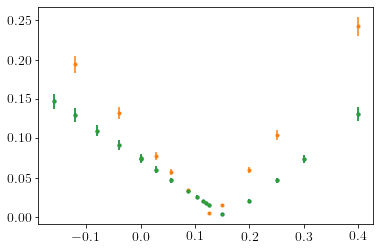

In [10]:
plt.errorbar(nu_bezcond, beta_bezcond, fmt='.', yerr=beta_sigma_bezcond)
plt.errorbar(nu_cond, beta_cond, fmt='.', yerr=beta_sigma_cond)

plt.errorbar(nu_bezcond, beta_bezcond, fmt='.', yerr=beta_sigma_bezcond)

In [11]:
# pro data z 3.5.2020
# ---- napocitam si i bety
from EMM_min_func import get_beta, fl_signal

# parametry vypoctu beta

decay_rate = 2*np.pi * 21.008e6  # decay rate dle tabulek NISTu
laser_detun = -31e6 * 2*np.pi  # detuning 
laser_detun_sigma = 4e6 * 2*np.pi # sigma detun

# get beta
beta_3_5_20 = np.zeros(fotkor_shape_3_5_20[1])
beta_sigma_3_5_20 = np.zeros(fotkor_shape_3_5_20[1])
for k in range(fotkor_shape_3_5_20[1]-1):
    beta_3_5_20[k] = get_beta(Omega_3_5_20, decay_rate, laser_detun, np.abs(DeltaS_S_ratio_3_5_20[k]) )
    
    # get sigma beta
    jacob_F = root_func_grad( np.array([beta_3_5_20[k], np.abs(DeltaS_S_ratio_3_5_20[k]), Omega_3_5_20, laser_detun, decay_rate]) ) 
    # [dF/dbeta, dF/ddeltaS/S, dF/dOmega, dF/dDelta, dF/dGamma]
    
    # variance-cov parametru
    Sigma_param = np.diag([Delta_S_S_ratio_sigma_3_5_20[k]**2, Omega_sigma_3_5_20**2, laser_detun_sigma**2])
    
    beta_sigma_3_5_20[k] = np.sqrt( jacob_F[0]**-2 * jacob_F[1:-1] @ Sigma_param @ np.transpose( jacob_F[1:-1] ) )

beta_3_5_20[-1] = get_beta(Omega_3_5_20, decay_rate, -32e6 * 2*np.pi, np.abs(DeltaS_S_ratio_3_5_20[-1]) )

# get sigma beta
jacob_F = root_func_grad( np.array([beta_3_5_20[-1], np.abs(DeltaS_S_ratio_3_5_20[-1]), Omega_3_5_20, -32e6 * 2*np.pi, decay_rate]) ) 
# [dF/dbeta, dF/ddeltaS/S, dF/dOmega, dF/dDelta, dF/dGamma]

# variance-cov parametru
Sigma_param = np.diag([Delta_S_S_ratio_sigma_3_5_20[-1]**2, Omega_sigma_3_5_20**2, laser_detun_sigma**2])

beta_sigma_3_5_20[-1] = np.sqrt( jacob_F[0]**-2 * jacob_F[1:-1] @ Sigma_param @ np.transpose( jacob_F[1:-1] ) )

In [12]:
# ---- napocitam si i bety 9.5.2020
from EMM_min_func import get_beta, fl_signal

# parametry vypoctu beta

decay_rate = 2*np.pi * 21.008e6  # decay rate dle tabulek NISTu
laser_detun = -32e6 * 2*np.pi  # detuning 
laser_detun_sigma = 4e6 * 2*np.pi # sigma detun

# get beta
beta_1212 = np.zeros(fotkor_shape_1212[1])
beta_sigma_1212 = np.zeros(fotkor_shape_1212[1])
for k in range(fotkor_shape_1212[1]):
    beta_1212[k] = get_beta(Omega_1212, decay_rate, laser_detun, np.abs(DeltaS_S_ratio_1212[k]) )
    
    # get sigma beta
    jacob_F = root_func_grad( np.array([beta_1212[k], np.abs(DeltaS_S_ratio_1212[k]), Omega_1212, laser_detun, decay_rate]) ) 
    # [dF/dbeta, dF/ddeltaS/S, dF/dOmega, dF/dDelta, dF/dGamma]
    
    # variance-cov parametru
    Sigma_param = np.diag([Delta_S_S_ratio_sigma_1212[k]**2, Omega_sigma_1212**2, laser_detun_sigma**2])
    
    beta_sigma_1212[k] = np.sqrt( jacob_F[0]**-2 * jacob_F[1:-1] @ Sigma_param @ np.transpose( jacob_F[1:-1] ) )
    
# get beta
beta_945 = np.zeros(fotkor_shape_945[1])
beta_sigma_945 = np.zeros(fotkor_shape_945[1])
for k in range(fotkor_shape_945[1]):
    beta_945[k] = get_beta(Omega_945, decay_rate, laser_detun, np.abs(DeltaS_S_ratio_945[k]) )
    
    # get sigma beta
    jacob_F = root_func_grad( np.array([beta_945[k], np.abs(DeltaS_S_ratio_945[k]), Omega_945, laser_detun, decay_rate]) ) 
    # [dF/dbeta, dF/ddeltaS/S, dF/dOmega, dF/dDelta, dF/dGamma]
    
    # variance-cov parametru
    Sigma_param = np.diag([Delta_S_S_ratio_sigma_945[k]**2, Omega_sigma_945**2, laser_detun_sigma**2])
    
    beta_sigma_945[k] = np.sqrt( jacob_F[0]**-2 * jacob_F[1:-1] @ Sigma_param @ np.transpose( jacob_F[1:-1] ) )
    
# get beta
beta_1270 = np.zeros(fotkor_shape_1270[1])
beta_sigma_1270 = np.zeros(fotkor_shape_1270[1])
for k in range(fotkor_shape_1270[1]):
    beta_1270[k] = get_beta(Omega_1270, decay_rate, laser_detun, np.abs(DeltaS_S_ratio_1270[k]) )
    
    # get sigma beta
    jacob_F = root_func_grad( np.array([beta_1270[k], np.abs(DeltaS_S_ratio_1270[k]), Omega_1270, laser_detun, decay_rate]) ) 
    # [dF/dbeta, dF/ddeltaS/S, dF/dOmega, dF/dDelta, dF/dGamma]
    
    # variance-cov parametru
    Sigma_param = np.diag([Delta_S_S_ratio_sigma_1270[k]**2, Omega_sigma_1270**2, laser_detun_sigma**2])
    
    beta_sigma_1270[k] = np.sqrt( jacob_F[0]**-2 * jacob_F[1:-1] @ Sigma_param @ np.transpose( jacob_F[1:-1] ) )
    
# get beta
beta_596 = np.zeros(fotkor_shape_596[1])
beta_sigma_596 = np.zeros(fotkor_shape_596[1])
for k in range(fotkor_shape_596[1]):
    beta_596[k] = get_beta(Omega_596, decay_rate, laser_detun, np.abs(DeltaS_S_ratio_596[k]) )
    
    # get sigma beta
    jacob_F = root_func_grad( np.array([beta_596[k], np.abs(DeltaS_S_ratio_596[k]), Omega_596, laser_detun, decay_rate]) ) 
    # [dF/dbeta, dF/ddeltaS/S, dF/dOmega, dF/dDelta, dF/dGamma]
    
    # variance-cov parametru
    Sigma_param = np.diag([Delta_S_S_ratio_sigma_596[k]**2, Omega_sigma_596**2, laser_detun_sigma**2])
    
    beta_sigma_596[k] = np.sqrt( jacob_F[0]**-2 * jacob_F[1:-1] @ Sigma_param @ np.transpose( jacob_F[1:-1] ) )

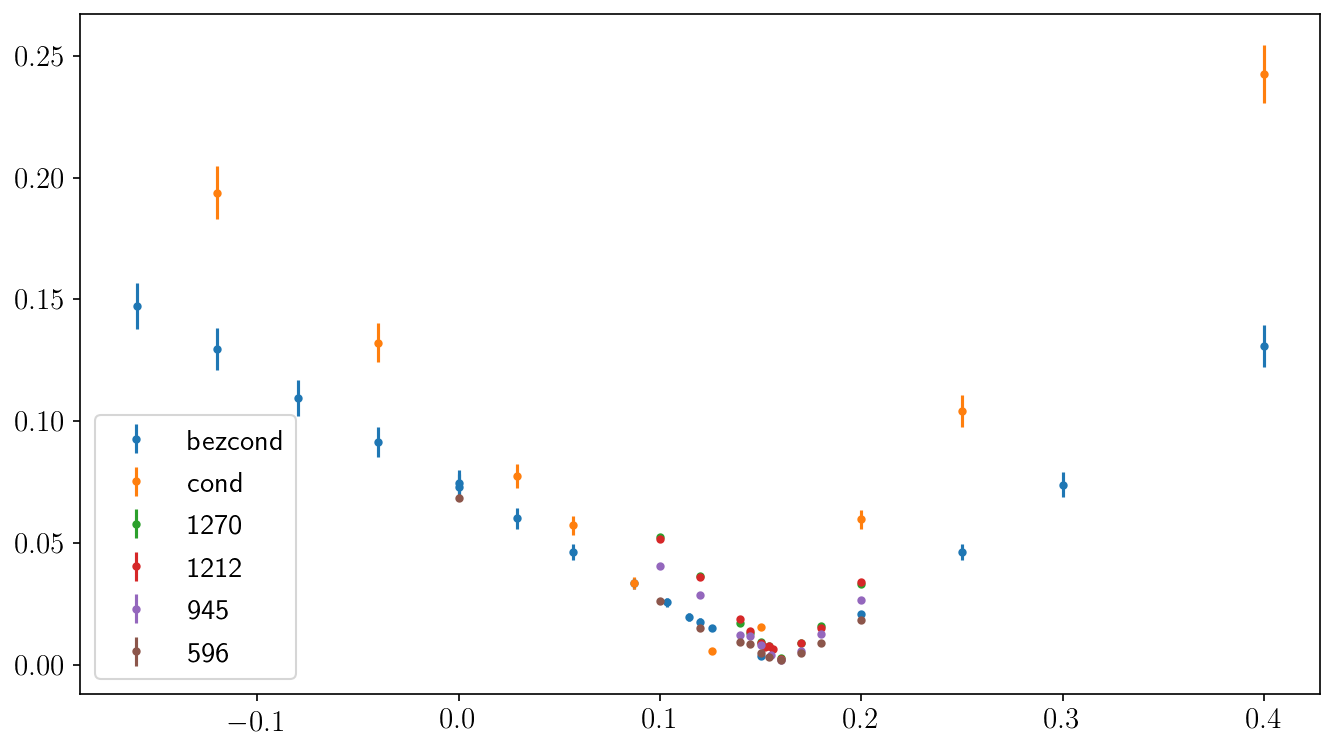

In [13]:
plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

plt.errorbar(nu_bezcond, beta_bezcond, fmt='.', yerr=beta_sigma_bezcond, label=r"bezcond")
plt.errorbar(nu_cond, beta_cond, fmt='.', yerr=beta_sigma_cond, label=r"cond")

# plt.errorbar(nu_3_5_20, beta_3_5_20, fmt='.', yerr=beta_sigma_3_5_20)
plt.errorbar(nu_1270, beta_1270, fmt='.', yerr=beta_sigma_1270, label=r"1270")
plt.errorbar(nu_1212, beta_1212, fmt='.', yerr=beta_sigma_1212, label=r"1212")
plt.errorbar(nu_945, beta_945, fmt='.', yerr=beta_sigma_945, label=r"945")
plt.errorbar(nu_596, beta_596, fmt='.', yerr=beta_sigma_596, label=r"596")

plt.legend()

In [14]:
# dalsi parametry
m = 40 * 1.66053904e-27 # calcium mass
k_vec = 2*np.pi * 1/(397e-9) # wave vector
e = 1.60217662e-19 # elem charge

# get E-fields
E_rf_bezcond = (m*Omega_bezcond**2 / (k_vec*e)) * beta_bezcond
E_rf_sigma_bezcond = np.sqrt( (beta_sigma_bezcond*m*Omega_bezcond**2 / (k_vec*e))**2 + (2*m*Omega_bezcond / (k_vec*e) * beta_bezcond * Omega_sigma_bezcond)**2  ) # propagase chyb

E_rf_cond = (m*Omega_cond**2 / (k_vec*e)) * beta_cond
E_rf_sigma_cond = np.sqrt( (beta_sigma_cond*m*Omega_cond**2 / (k_vec*e))**2 + (2*m*Omega_cond / (k_vec*e) * beta_cond * Omega_sigma_cond)**2  ) # propagase chyb

E_rf_3_5_20 = (m*Omega_3_5_20**2 / (k_vec*e)) * beta_3_5_20
E_rf_sigma_3_5_20 = np.sqrt( (beta_sigma_3_5_20*m*Omega_3_5_20**2 / (k_vec*e))**2 + (2*m*Omega_3_5_20 / (k_vec*e) * beta_3_5_20 * Omega_sigma_3_5_20)**2  ) # propagase chyb

E_rf_1212 = (m*Omega_1212**2 / (k_vec*e)) * beta_1212
E_rf_sigma_1212 = np.sqrt( (beta_sigma_1212*m*Omega_1212**2 / (k_vec*e))**2 + (2*m*Omega_1212 / (k_vec*e) * beta_1212 * Omega_sigma_1212)**2  ) # propagase chyb

E_rf_1270 = (m*Omega_1270**2 / (k_vec*e)) * beta_1270
E_rf_sigma_1270 = np.sqrt( (beta_sigma_1270*m*Omega_1270**2 / (k_vec*e))**2 + (2*m*Omega_1270 / (k_vec*e) * beta_1270 * Omega_sigma_1270)**2  ) # propagase chyb

E_rf_945 = (m*Omega_945**2 / (k_vec*e)) * beta_945
E_rf_sigma_945 = np.sqrt( (beta_sigma_945*m*Omega_945**2 / (k_vec*e))**2 + (2*m*Omega_945 / (k_vec*e) * beta_945 * Omega_sigma_945)**2  ) # propagase chyb

E_rf_596 = (m*Omega_596**2 / (k_vec*e)) * beta_596
E_rf_sigma_596 = np.sqrt( (beta_sigma_596*m*Omega_596**2 / (k_vec*e))**2 + (2*m*Omega_596 / (k_vec*e) * beta_596 * Omega_sigma_596)**2  ) # propagase chyb



## fitovani dat modelem

In [451]:
## nacteni dat ze souboru
# pole generovano axialni elektrodou v + 2.25mm
z_data = np.genfromtxt("axial_field_unitary_rad_ax_delim.txt")[:,1]
# E_field_ax_data = np.genfromtxt("axial_field_unitary_rad_ax_delim.txt")[:,2]
E_field_ax_data = np.genfromtxt("axial_field_unitary_rad_ax_correct_ax_pos_delim.txt")[:,2]
E_field_rad_data_par = np.genfromtxt("axial_field_unitary_rad_ax_delim.txt")[:,3]
E_field_rad_data_jedna = E_field_rad_data_par/2 # pole generovane jednou radialni elektrodou na ose z je polovicni oproti poli
# E_field_rad_data_jedna = E_field_rad_data_par/4         # pokud vemu polovinu pole z modelu, tak sedi relativne dobre na mereni                                     
    
leng_data = len(z_data)

from scipy import interpolate

# definice interpolacnich fci
E_field_ax_6 = interpolate.interp1d(z_data*1e3, E_field_ax_data, kind='quadratic')
E_field_ax_5 = interpolate.interp1d(z_data*1e3, -1*E_field_ax_data[::-1], kind='quadratic')
E_field_rad_jedna = interpolate.interp1d(z_data*1e3, E_field_rad_data_jedna, kind='quadratic')

### prepocet nu na z funkce:
def get_z_given_nu(nu, delta_z_ax):
    # funkce vraci axialni polohu iontu 
    # input: nu, [delta_z_ax_5, delta_z_ax_6]
    a = 0.000357087248516796 *1e6
    b = 0.0000614272209845667 *1e6
    c = 0.000214572720416111 *1e6
    
    return( a* nu + b* nu**3 + c *nu**5 + sum(delta_z_ax) * 0.5 )

# funkce vracejici amplitudu rf pole v zavislosti na nu a na ostatnich parametrech
def E_rf_asym_amp_nu(Vrf, phi, delta_z_ax, nu, f_interp):
    # Vrf = [Vrf_1, Vrf_3, Vrf_5, Vrf_6] # defaultne mam Vrf24 = 0 => asym drive
    # phi = [phi_1 = 0, phi_2, phi_56]  # phi_1 = 0 -- volba, dale pak phi_5=phi_6
    # delta_z_ax - [vychyleni ax_5, vychyleni ax_6]
    # nu = [] body, ve kterych chci fci vyhodnotit
    # f_interp = (E_field_rad, E_field_ax5, E_field_ax6) 
    
    # out: amplituda E_pole
    
    rad_amp = sum( Vrf[0:2] * np.exp(phi[0:2] * 1j ) )
    ax_5_amp = Vrf[2] * np.exp(phi[2] * 1j )
    ax_6_amp = Vrf[3] * np.exp(phi[2] * 1j )
    
    z = get_z_given_nu(nu, delta_z_ax)
    E_rf_complex = rad_amp * f_interp[0](z) + ax_5_amp * f_interp[1](z - delta_z_ax[0]) + ax_6_amp * f_interp[2](z - delta_z_ax[1])

    # amplituda a faze
    return np.abs(E_rf_complex)

# funkce vracejici fazi rf pole v zavislosti na nu a na ostatnich parametrech
def E_rf_asym_phase_nu(Vrf, phi, delta_z_ax, nu, f_interp):
    # Vrf = [Vrf_1, Vrf_3, Vrf_5, Vrf_6] # defaultne mam Vrf24 = 0 => asym drive
    # phi = [phi_1 = 0, phi_2, phi_56]  # phi_1 = 0 -- volba, dale pak phi_5=phi_6
    # delta_z_ax - [vychyleni ax_5, vychyleni ax_6]
    # nu = [] body, ve kterych chci fci vyhodnotit
    # f_interp = (E_field_rad, E_field_ax5, E_field_ax6) 
    
    # out: amplituda E_pole
    
    rad_amp = sum( Vrf[0:2] * np.exp(phi[0:2] * 1j ) )
    ax_5_amp = Vrf[2] * np.exp(phi[2] * 1j )
    ax_6_amp = Vrf[3] * np.exp(phi[2] * 1j )
    
    z = get_z_given_nu(nu, delta_z_ax)
    E_rf_complex = rad_amp * f_interp[0](z) + ax_5_amp * f_interp[1](z - delta_z_ax[0]) + ax_6_amp * f_interp[2](z - delta_z_ax[1])

    # amplituda a faze
    return np.angle( E_rf_complex )

# E_field_ax_5(-999)
# plt.plot(z_data, E_field_ax_data)

In [452]:
# # # funkce vracejici residua
def fit_resid_E_amp_multiple_RF_voltages(x, nu_data_1, nu_data_2, nu_data_3, nu_data_4, 
                                         E_amp_data_1, E_amp_data_2, E_amp_data_3, E_amp_data_4,
                                         Vrf_radial_coef_1, Vrf_radial_coef_2, Vrf_radial_coef_3, Vrf_radial_coef_4):
    # x = [Vrf_asym scale, Vrf_axial scale, delta ax sum ]
    
    delta_z_ax = [x[2]/2, x[2]/2]
    
    
    #----- data 1
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_1
    Vrf_6 = x[0] * Vrf_radial_coef_1
    
    Vrf = [Vrf_radial_coef_1 * x[1], Vrf_radial_coef_1*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 1
    E_rf_amp_resid_1 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_1,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_1
    #==============================
    
    #-------- data 2
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_2
    Vrf_6 = x[0] * Vrf_radial_coef_2
    
    Vrf = [Vrf_radial_coef_2*x[1], Vrf_radial_coef_2*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_2 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_2,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_2
    #==============================
    
    #-------- data 3
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_3
    Vrf_6 = x[0] * Vrf_radial_coef_3
    
    Vrf = [Vrf_radial_coef_3*x[1], Vrf_radial_coef_3*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_3 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_3,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_3
    #==============================
    
    #-------- data 4
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_4
    Vrf_6 = x[0] * Vrf_radial_coef_4
    
    Vrf = [Vrf_radial_coef_4*x[1], Vrf_radial_coef_4*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_4 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_4,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_4
    #==============================
    
    
    return( np.concatenate((E_rf_amp_resid_1, E_rf_amp_resid_2, E_rf_amp_resid_3, E_rf_amp_resid_4) ) )

# # # funkce vracejici residua
def fit_resid_E_amp_with_cond_RF_voltages(x, nu_data_1, nu_data_2, nu_data_3, nu_data_4, nu_cond,
                                         E_amp_data_1, E_amp_data_2, E_amp_data_3, E_amp_data_4, E_amp_data_cond,
                                         Vrf_radial_coef_1, Vrf_radial_coef_2, Vrf_radial_coef_3, Vrf_radial_coef_4, Vrf_radial_coef_cond):
    # x = [Vrf_asym scale, Vrf_axial scale, delta ax sum ]
    
    delta_z_ax = [x[2]/2, x[2]/2]
    
    
    #----- data 1
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_1
    Vrf_6 = x[0] * Vrf_radial_coef_1
    
    Vrf = [Vrf_radial_coef_1 * x[1], Vrf_radial_coef_1*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 1
    E_rf_amp_resid_1 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_1,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_1
    #==============================
    
    #-------- data 2
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_2
    Vrf_6 = x[0] * Vrf_radial_coef_2
    
    Vrf = [Vrf_radial_coef_2*x[1], Vrf_radial_coef_2*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_2 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_2,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_2
    #==============================
    
    #-------- data 3
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_3
    Vrf_6 = x[0] * Vrf_radial_coef_3
    
    Vrf = [Vrf_radial_coef_3*x[1], Vrf_radial_coef_3*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_3 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_3,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_3
    #==============================
    
    #-------- data 4
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_4
    Vrf_6 = x[0] * Vrf_radial_coef_4
    
    Vrf = [Vrf_radial_coef_4*x[1], Vrf_radial_coef_4*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_4 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_4,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_4
    #==============================
    
    #-------- data 4
    Vrf_5 = x[0] * Vrf_radial_coef_cond
    Vrf_6 = x[0] * Vrf_radial_coef_cond
    
    Vrf = [Vrf_radial_coef_cond*x[1], Vrf_radial_coef_cond*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_cond = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_cond,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_cond
    #==============================
    
    
    return( np.concatenate((E_rf_amp_resid_1, E_rf_amp_resid_2, E_rf_amp_resid_3, E_rf_amp_resid_4, E_rf_amp_resid_cond) ) )

# # # funkce vracejici residua
def fit_resid_E_amp_with_cond_bezcond_RF_voltages(x, nu_data_1, nu_data_2, nu_data_3, nu_data_4, nu_cond, nu_bezcond,
                                         E_amp_data_1, E_amp_data_2, E_amp_data_3, E_amp_data_4, E_amp_data_cond, E_amp_data_bezcond,
                                         Vrf_radial_coef_1, Vrf_radial_coef_2, Vrf_radial_coef_3, Vrf_radial_coef_4, Vrf_radial_coef_cond):
    # x = [Vrf_asym scale, Vrf_axial scale, delta ax sum ]
    
    delta_z_ax = [x[2]/2, x[2]/2]
    
    
    #----- data 1
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_1
    Vrf_6 = x[0] * Vrf_radial_coef_1
    
    Vrf = [Vrf_radial_coef_1 * x[1], Vrf_radial_coef_1*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 1
    E_rf_amp_resid_1 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_1,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_1
    #==============================
    
    #-------- data 2
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_2
    Vrf_6 = x[0] * Vrf_radial_coef_2
    
    Vrf = [Vrf_radial_coef_2*x[1], Vrf_radial_coef_2*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_2 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_2,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_2
    #==============================
    
    #-------- data 3
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_3
    Vrf_6 = x[0] * Vrf_radial_coef_3
    
    Vrf = [Vrf_radial_coef_3*x[1], Vrf_radial_coef_3*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_3 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_3,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_3
    #==============================
    
    #-------- data 4
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_4
    Vrf_6 = x[0] * Vrf_radial_coef_4
    
    Vrf = [Vrf_radial_coef_4*x[1], Vrf_radial_coef_4*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_4 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_4,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_4
    #==============================
    
    #-------- data cond
    Vrf_5 = x[0] * Vrf_radial_coef_cond
    Vrf_6 = x[0] * Vrf_radial_coef_cond
    
    Vrf = [Vrf_radial_coef_cond*x[1], Vrf_radial_coef_cond*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_cond = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_cond,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_cond
    #==============================
    
    #-------- data bezcond
    Vrf_5 = 0.84* x[0] * x[4]
    Vrf_6 = x[0] * x[4]
    
    Vrf = [x[1]*x[4], x[1]*x[4], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_bezcond = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_bezcond,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_bezcond
    #==============================
    
    
    return( np.concatenate((E_rf_amp_resid_1, E_rf_amp_resid_2, E_rf_amp_resid_3, E_rf_amp_resid_4, E_rf_amp_resid_cond, E_rf_amp_resid_bezcond) ) )

# # # funkce vracejici residua
def fit_resid_E_amp_with_all_RF_voltages(x, nu_data_1, nu_data_2, nu_data_3, nu_data_4, nu_cond, nu_bezcond, nu_data_5,
                                         E_amp_data_1, E_amp_data_2, E_amp_data_3, E_amp_data_4, E_amp_data_cond, E_amp_data_bezcond, E_amp_data_5,
                                         Vrf_radial_coef_1, Vrf_radial_coef_2, Vrf_radial_coef_3, Vrf_radial_coef_4, Vrf_radial_coef_cond):
    # x = [Vrf_asym scale, Vrf_axial scale, delta ax sum ]
    
    delta_z_ax = [x[2]/2, x[2]/2]  # zda se, ze toto plati pouze pokud jsou Vrf5 a Vrf6 stejne
#     delta_z_ax = [x[2], x[6]]
    
    #----- data 1
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_1 
    Vrf_6 = x[0] * Vrf_radial_coef_1 
    
    Vrf = [Vrf_radial_coef_1 * x[1], Vrf_radial_coef_1*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 1
    E_rf_amp_resid_1 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_1,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_1
    #==============================
    
    #-------- data 2
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_2 
    Vrf_6 = x[0] * Vrf_radial_coef_2 
    
    Vrf = [Vrf_radial_coef_2*x[1], Vrf_radial_coef_2*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_2 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_2,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_2
    #==============================
    
    #-------- data 3
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_3 
    Vrf_6 = x[0] * Vrf_radial_coef_3 
    
    Vrf = [Vrf_radial_coef_3*x[1], Vrf_radial_coef_3*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_3 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_3,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_3
    #==============================
    
    #-------- data 4
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_4 
    Vrf_6 = x[0] * Vrf_radial_coef_4 
    
    Vrf = [Vrf_radial_coef_4*x[1], Vrf_radial_coef_4*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_4 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_4,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_4
    #==============================
    
    #-------- data cond
    Vrf_5 = x[0] * Vrf_radial_coef_cond 
    Vrf_6 = x[0] * Vrf_radial_coef_cond 
#     Vrf_5 = 31.5 * x[7]
#     Vrf_6 = 31.5 * x[7]
    
    Vrf = [Vrf_radial_coef_cond*x[1], Vrf_radial_coef_cond*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_cond = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_cond,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_cond
    #==============================
    
    #-------- data bezcond
    Vrf_5 = 0.84* x[0] * x[4] 
    Vrf_6 = x[0] * x[4] 
#     Vrf_5 = 42.5 * x[7]
#     Vrf_6 = 50 * x[7]
    
    Vrf = [x[1]*x[4], x[1]*x[4], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_bezcond = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_bezcond,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_bezcond
    #==============================
    
    #-------- data 5.3.2020
    Vrf_5 = 0.84* x[0] * x[5] 
    Vrf_6 = x[0] * x[5]
    
    Vrf = [x[1]*x[5], x[1]*x[5], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_5= E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_5,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_5
    #==============================
    
    
    return( np.concatenate((E_rf_amp_resid_1, E_rf_amp_resid_2, E_rf_amp_resid_3, E_rf_amp_resid_4, E_rf_amp_resid_cond, E_rf_amp_resid_bezcond, E_rf_amp_resid_5) ) )
###############################################################
# # # funkce vracejici residua
def fit_resid_E_amp_with_all_RF_voltages_modif(x, nu_data_1, nu_data_2, nu_data_3, nu_data_4, nu_cond, nu_bezcond, nu_data_5,
                                         E_amp_data_1, E_amp_data_2, E_amp_data_3, E_amp_data_4, E_amp_data_cond, E_amp_data_bezcond, E_amp_data_5,
                                         Vrf_radial_coef_1, Vrf_radial_coef_2, Vrf_radial_coef_3, Vrf_radial_coef_4, Vrf_radial_coef_cond):
    # x = [Vrf_asym scale, Vrf_axial scale, delta ax sum ]
    
    delta_z_ax = [x[2]/2, x[2]/2]  # zda se, ze toto plati pouze pokud jsou Vrf5 a Vrf6 stejne
#     delta_z_ax = [x[2], x[6]]
#     delta_z_ax = [x[2], -65.81603842 - x[2]]
#     delta_z_ax = [x[2], -5.84531618e+01 - x[2]]
#     delta_z_ax = [x[2], -80 - x[2]]
#     delta_z_ax = [ 188.73696486, -241.36596702]
    
    #----- data 1
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_1 
    Vrf_6 = x[0] * Vrf_radial_coef_1 
    
    Vrf = [Vrf_radial_coef_1 * x[1], Vrf_radial_coef_1*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 1
    E_rf_amp_resid_1 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_1,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_1
    #==============================
    
    #-------- data 2
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_2 
    Vrf_6 = x[0] * Vrf_radial_coef_2 
    
    Vrf = [Vrf_radial_coef_2*x[1], Vrf_radial_coef_2*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_2 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_2,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_2
    #==============================
    
    #-------- data 3
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_3 
    Vrf_6 = x[0] * Vrf_radial_coef_3 
    
    Vrf = [Vrf_radial_coef_3*x[1], Vrf_radial_coef_3*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_3 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_3,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_3
    #==============================
    
    #-------- data 4
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_4 
    Vrf_6 = x[0] * Vrf_radial_coef_4 
    
    Vrf = [Vrf_radial_coef_4*x[1], Vrf_radial_coef_4*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_4 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_4,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_4
    #==============================
    
    #-------- data cond
#     Vrf_5 = x[0] * Vrf_radial_coef_cond 
#     Vrf_6 = x[0] * Vrf_radial_coef_cond 
    Vrf_5 = 31.5
    Vrf_6 = 31.5
    
    Vrf = [Vrf_radial_coef_cond*x[1], Vrf_radial_coef_cond*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_cond = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_cond,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_cond
    #==============================
    
    #-------- data bezcond
    Vrf_5 = 0.84* x[0] * x[4] 
    Vrf_6 = x[0] * x[4] 
#     Vrf_5 = 42.5 * x[7]
#     Vrf_6 = 50 * x[7]
    
    Vrf = [x[1]*x[4], x[1]*x[4], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_bezcond = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_bezcond,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_bezcond
    #==============================
    
    #-------- data 5.3.2020
    Vrf_5 = 0.84* x[0] * x[5] 
    Vrf_6 = x[0] * x[5]
    
    Vrf = [x[1]*x[5], x[1]*x[5], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_5= E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_5,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_5
    #==============================
    
    
    return( np.concatenate((E_rf_amp_resid_1, E_rf_amp_resid_2, E_rf_amp_resid_3, E_rf_amp_resid_4, E_rf_amp_resid_cond, E_rf_amp_resid_bezcond, E_rf_amp_resid_5) ) )

# # # funkce vracejici residua
def fit_resid_E_amp_with_all_RF_voltages_modif_fix_deltas(x, nu_data_1, nu_data_2, nu_data_3, nu_data_4, nu_cond, nu_bezcond, nu_data_5,
                                         E_amp_data_1, E_amp_data_2, E_amp_data_3, E_amp_data_4, E_amp_data_cond, E_amp_data_bezcond, E_amp_data_5,
                                         Vrf_radial_coef_1, Vrf_radial_coef_2, Vrf_radial_coef_3, Vrf_radial_coef_4, Vrf_radial_coef_cond, delta_z_ax):
    # x = [Vrf_asym scale, Vrf_axial scale, delta ax sum ]
    
#     delta_z_ax = [x[2]/2, x[2]/2]  # zda se, ze toto plati pouze pokud jsou Vrf5 a Vrf6 stejne
#     delta_z_ax = [x[2], x[6]]
#     delta_z_ax = [x[2], -65.81603842 - x[2]]
#     delta_z_ax = [x[2], -5.84531618e+01 - x[2]]
#     delta_z_ax = [x[2], -80 - x[2]]
#     delta_z_ax = [ 188.73696486, -241.36596702]
    
    #----- data 1
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_1 
    Vrf_6 = x[0] * Vrf_radial_coef_1 
    
    Vrf = [Vrf_radial_coef_1 * x[1], Vrf_radial_coef_1*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[2]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 1
    E_rf_amp_resid_1 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_1,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_1
    #==============================
    
    #-------- data 2
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_2 
    Vrf_6 = x[0] * Vrf_radial_coef_2 
    
    Vrf = [Vrf_radial_coef_2*x[1], Vrf_radial_coef_2*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[2]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_2 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_2,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_2
    #==============================
    
    #-------- data 3
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_3 
    Vrf_6 = x[0] * Vrf_radial_coef_3 
    
    Vrf = [Vrf_radial_coef_3*x[1], Vrf_radial_coef_3*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[2]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_3 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_3,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_3
    #==============================
    
    #-------- data 4
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_4 
    Vrf_6 = x[0] * Vrf_radial_coef_4 
    
    Vrf = [Vrf_radial_coef_4*x[1], Vrf_radial_coef_4*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[2]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_4 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_4,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_4
    #==============================
    
    #-------- data cond
#     Vrf_5 = x[0] * Vrf_radial_coef_cond 
#     Vrf_6 = x[0] * Vrf_radial_coef_cond 
    Vrf_5 = 31.5
    Vrf_6 = 31.5
    
    Vrf = [Vrf_radial_coef_cond*x[1], Vrf_radial_coef_cond*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[2]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_cond = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_cond,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_cond
    #==============================
    
    #-------- data bezcond
    Vrf_5 = 0.84* x[0] * x[3] 
    Vrf_6 = x[0] * x[3] 
#     Vrf_5 = 42.5 * x[7]
#     Vrf_6 = 50 * x[7]
    
    Vrf = [x[1]*x[3], x[1]*x[3], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[2]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_bezcond = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_bezcond,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_bezcond
    #==============================
    
    #-------- data 5.3.2020
    Vrf_5 = 0.84* x[0] * x[4] 
    Vrf_6 = x[0] * x[4]
    
    Vrf = [x[1]*x[4], x[1]*x[4], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[2]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_5= E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_5,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_5
    #==============================
    
    
    return( np.concatenate((E_rf_amp_resid_1, E_rf_amp_resid_2, E_rf_amp_resid_3, E_rf_amp_resid_4, E_rf_amp_resid_cond, E_rf_amp_resid_bezcond, E_rf_amp_resid_5) ) )

def fit_sum_to_secfreq(x, delta_z_ax_sum):
    ############# sekularni frekvence
    z = np.linspace(-100, 100, 1000)
    
#     delta_z_ax_5 = x
    delta_z_ax = [x, delta_z_ax_sum - x]
    
    E_field_ax_dc = E_field_ax_5(z - delta_z_ax[0]) + E_field_ax_6(z - delta_z_ax[1])

    # z, kde E=0
    min_ind = np.argmin(np.abs(E_field_ax_dc))
    z_zero = z[min_ind]

    # numericka derivace E-pole v nulovem bode
    dE_dz = (E_field_ax_dc[min_ind+10] - E_field_ax_dc[min_ind-10]) / (z[min_ind+10]*1e-6 - z[min_ind-10]*1e-6) 

    kappa_over_z02 = - 0.5 * dE_dz
    kappa = 2.25e-3**2 * kappa_over_z02
    z02 = 1/kappa_over_z02
    z0 = np.sqrt(z02)
    z0_resid = [z0 - 0.0092]
    ##############################
    return(z0_resid)

In [453]:
from scipy.optimize import least_squares

# x0 = np.array( [0.08, 0.5, -50, 0.0] )
# bbounds = ([0.001, 0.2,-100, 0],[0.15,1,0, 2*np.pi] )

# x0 = np.array( [0.05, 0.3, -100, 0.0, 500, 500] )
# bbounds = ([0.001, 0.2,-200, 0, 100, 100],[0.35,10,0, 0.1, 1300, 1300] )

x0 = np.array( [0.078, 0.9, -60, 0.0, 330, 500] )
bbounds = ([0.001, 0.1,-200, 0, 100, 100],[0.5,10,200, 0.15, 1300, 1300] )
# x0 = np.array( [0.078, 0.9, 0, 0.0, 330, 500, 0] )
# bbounds = ([0.001, 0.2,-100, 0, 100, 100, -100],[0.5,10,100, 0.1, 1300, 1300, 100] )

# x0 = np.array( [0.078, 0.9, 0, 0.0, 330, 500, 0, 0.9] )
# bbounds = ([0.001, 0.2,-100, 0, 100, 100, -100, 0.5],[0.30,10,200, 0.1, 1300, 1300, 200, 1.5] )
# bbounds = ([0.07, 0.8,-100, 0, 300, 400, -100],[0.09,1,200, 0.1, 400, 600, 200] )


# x0 = np.array( [0.05, 0.3, -50, 0.0, 500, 400, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] )
# bbounds = ([0.001, 0.2,-200, 0, 100, 100, 0, 0, 0, 0, 0, 0],[0.15,10,0, 0.2, 1300, 1300, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2] )

Vrf_radial_coef_1 = 1221/2
Vrf_radial_coef_2 = 943/2
Vrf_radial_coef_3 = 1270/2
Vrf_radial_coef_4 = 594/2
Vrf_radial_coef_cond = 1190/2
exper_data_scale = 1

# fit = least_squares(fit_resid_E_amp_with_all_RF_voltages_diff_phases, x0, args=(nu_1212, nu_945, nu_1270, nu_596, nu_cond, nu_bezcond, nu_3_5_20, E_rf_1212, E_rf_945, E_rf_1270, E_rf_596, E_rf_cond, E_rf_bezcond, E_rf_3_5_20, Vrf_radial_coef_1, Vrf_radial_coef_2, Vrf_radial_coef_3, Vrf_radial_coef_4, Vrf_radial_coef_cond) , ftol=1e-10, xtol=1e-10,
#                     bounds=bbounds)

# fit = least_squares(fit_resid_E_amp_with_all_RF_voltages, x0, args=(nu_1212, nu_945, nu_1270, nu_596, nu_cond, nu_bezcond, nu_3_5_20, E_rf_1212, E_rf_945, E_rf_1270, E_rf_596, E_rf_cond, E_rf_bezcond, E_rf_3_5_20, Vrf_radial_coef_1, Vrf_radial_coef_2, Vrf_radial_coef_3, Vrf_radial_coef_4, Vrf_radial_coef_cond) , ftol=1e-10, xtol=1e-10,
#                     bounds=bbounds)

fit = least_squares(fit_resid_E_amp_with_all_RF_voltages_modif, x0, args=(nu_1212, nu_945, nu_1270, nu_596, nu_cond, nu_bezcond, nu_3_5_20, exper_data_scale*E_rf_1212, exper_data_scale*E_rf_945, exper_data_scale*E_rf_1270, exper_data_scale*E_rf_596, exper_data_scale*E_rf_cond, exper_data_scale*E_rf_bezcond, exper_data_scale*E_rf_3_5_20, Vrf_radial_coef_1, Vrf_radial_coef_2, Vrf_radial_coef_3, Vrf_radial_coef_4, Vrf_radial_coef_cond) , ftol=1e-10, xtol=1e-10,
                    bounds=bbounds)

# fit = least_squares(fit_resid_E_amp_with_cond_bezcond_RF_voltages, x0, args=(nu_1212, nu_945, nu_1270, nu_596, nu_cond, nu_bezcond, E_rf_1212, E_rf_945, E_rf_1270, E_rf_596, E_rf_cond, E_rf_bezcond, Vrf_radial_coef_1, Vrf_radial_coef_2, Vrf_radial_coef_3, Vrf_radial_coef_4, Vrf_radial_coef_cond) , ftol=1e-10, xtol=1e-10,
#                     bounds=bbounds)

# fit = least_squares(fit_resid_E_amp_with_cond_RF_voltages, x0, args=(nu_1212, nu_945, nu_1270, nu_596, nu_cond, E_rf_1212, E_rf_945, E_rf_1270, E_rf_596, E_rf_cond, Vrf_radial_coef_1, Vrf_radial_coef_2, Vrf_radial_coef_3, Vrf_radial_coef_4, Vrf_radial_coef_cond) , ftol=1e-10, xtol=1e-10,
#                     bounds=bbounds)
# fit = least_squares(fit_resid_E_amp_multiple_RF_voltages, x0, args=(nu_1212, nu_945, nu_1270, nu_596, E_rf_1212, E_rf_945, E_rf_1270, E_rf_596, Vrf_radial_coef_1, Vrf_radial_coef_2, Vrf_radial_coef_3, Vrf_radial_coef_4) , ftol=1e-10, xtol=1e-10,
#                     bounds=bbounds)

print(fit.optimality)
print(fit.x)
print( sum(fit.fun**2) )
# fit
# zda se, ze dostupne informace nemuzou poskytnout jednoznacne urceni koeficientu

x02 = 0
bbounds2 = ([fit.x[2] ], [-fit.x[2]])
fit2 = least_squares(fit_sum_to_secfreq, x02, args=(fit.x[2],), bounds=bbounds2 )
# print(fit2)

delta_z_ax = [fit2.x[0], fit.x[2] - fit2.x[0]]


x0 = np.array( [0.078, 0.9, 0.0, 330, 500] )
bbounds = ([0.001, 0.1, 0, 100, 100],[0.5,10, 0.15, 1300, 1300] )

fit = least_squares(fit_resid_E_amp_with_all_RF_voltages_modif_fix_deltas, x0, args=(nu_1212, nu_945, nu_1270, nu_596, nu_cond, nu_bezcond, nu_3_5_20, exper_data_scale*E_rf_1212, exper_data_scale*E_rf_945, exper_data_scale*E_rf_1270, exper_data_scale*E_rf_596, exper_data_scale*E_rf_cond, exper_data_scale*E_rf_bezcond, exper_data_scale*E_rf_3_5_20, Vrf_radial_coef_1, Vrf_radial_coef_2, Vrf_radial_coef_3, Vrf_radial_coef_4, Vrf_radial_coef_cond, delta_z_ax) , ftol=1e-10, xtol=1e-10,
                    bounds=bbounds)

print(fit.optimality)
print(fit.x)
print( sum(fit.fun**2) )


0.08105174783467631
[ 5.90770334e-02  4.07807103e-01 -6.56147342e+01  5.56150651e-02
  3.49593692e+02  5.43366848e+02]
469.3336405983746
0.008567002050640518
[6.03988235e-02 4.04434849e-01 5.61403949e-02 3.52426880e+02
 5.47746466e+02]
482.78994060410565


In [454]:
### overeni hodnoty sekularni frekvence
# U_dc_5 = 1
# U_dc_6 = 1
# delta_z_ax = [fit.x[2], -5.84531618e+01 - fit.x[2]]
# delta_z_ax = [fit.x[2], fit.x[6]]
# delta_z_ax = [fit.x[2]/2, fit.x[2]/2]
# delta_z_ax = [0, 0]
# delta_z_ax = [fit.x[2], -65.81603842 - fit.x[2]]
z = np.linspace(-200, 200, 1000)

E_field_ax_dc = E_field_ax_5(z - delta_z_ax[0]) + E_field_ax_6(z - delta_z_ax[1])

# z, kde E=0
min_ind = np.argmin(np.abs(E_field_ax_dc))
z_zero = z[min_ind]

# numericka derivace E-pole v nulovem bode
dE_dz = (E_field_ax_dc[min_ind+10] - E_field_ax_dc[min_ind-10]) / (z[min_ind+10] - z[min_ind-10]) 

kappa_over_z02 = - 0.5 * dE_dz * 1e6
kappa = 2.25e-3**2 * kappa_over_z02
z02 = 1/kappa_over_z02
z0 = np.sqrt(z02)
print(z0)
# plt.plot(z, E_field_ax_dc, '.')

0.00918875628129054


[-43.05686478733233, -22.557869379268766]
[246.90747531 246.90747531  30.97372466  36.87348174]
[190.6910313  190.6910313   23.92155803  28.47804528]
[256.81612911 256.81612911  32.21673245  38.35325292]
[120.11715015 120.11715015  15.06829848  17.93845058]


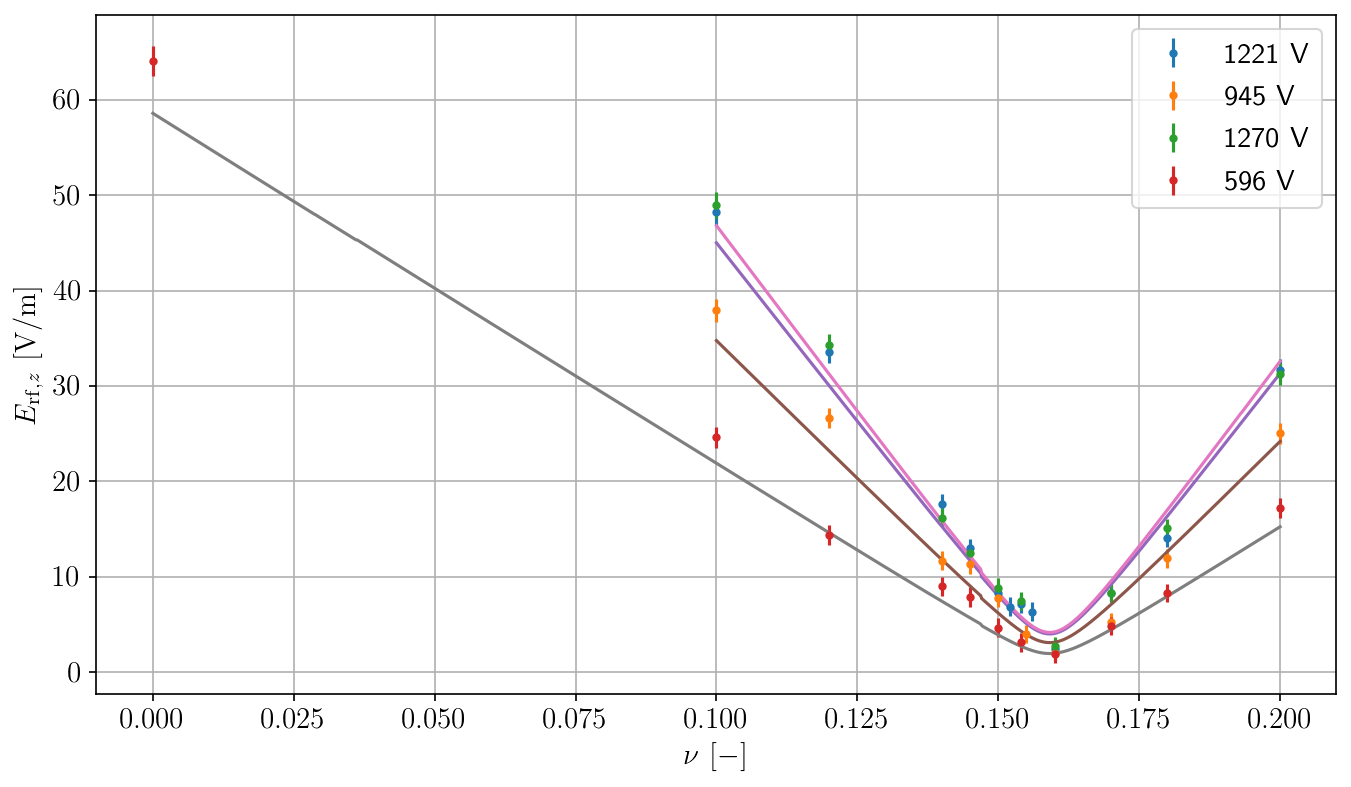

In [455]:
# delta_z_ax = [fit.x[2]/2, fit.x[2]/2]
# delta_z_ax = [fit.x[2], fit.x[6]]
# delta_z_ax = [fit.x[2], -65.81603842 - fit.x[2]]
# delta_z_ax = [fit.x[2], -5.84531618e+01 - fit.x[2]]
# delta_z_ax = [fit.x[2], -80 - fit.x[2]]
print(delta_z_ax)
# print(delta_z_ax[0]/delta_z_ax[1])
# napeti a faze na elektrodach pasti
Vrf_1 = Vrf_radial_coef_1 * fit.x[1]
Vrf_3 = Vrf_radial_coef_1 * fit.x[1]
# Vrf_1 = Vrf_radial_coef_1
# Vrf_3 = Vrf_radial_coef_1 
# Vrf_5 = 17 
# Vrf_6 = 20 
Vrf_5 = 0.84*fit.x[0] * Vrf_radial_coef_1
Vrf_6 = fit.x[0] * Vrf_radial_coef_1
Vrf = np.array( [Vrf_1, Vrf_3, Vrf_5, Vrf_6] )
print(Vrf)
phi_2 = 0
# phi_56 = fit.x[3]
phi_56 = fit.x[2]
# phi_56 = 0.1

phi = np.array( [0, phi_2, phi_56] )

nu_range = np.linspace(0.1, 0.2, 1000)
E_rf_amp_1 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
E_rf_phase_1 = np.unwrap( E_rf_asym_phase_nu(Vrf, phi, delta_z_ax,nu_range,
                                                   (E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) )

#---------- pro druhe data:
# napeti a faze na elektrodach pasti
Vrf_1 = Vrf_radial_coef_2 * fit.x[1]
Vrf_3 = Vrf_radial_coef_2 * fit.x[1]
# Vrf_1 = Vrf_radial_coef_2
# Vrf_3 = Vrf_radial_coef_2
# Vrf_5 = 17 
# Vrf_6 = 20 
Vrf_5 = 0.84*fit.x[0] * Vrf_radial_coef_2
Vrf_6 = fit.x[0] * Vrf_radial_coef_2
Vrf = np.array( [Vrf_1, Vrf_3, Vrf_5, Vrf_6] )
print(Vrf)
phi_2 = 0
# phi_56 = fit.x[3]
phi_56 = fit.x[2]
# phi_56 = 0.1

phi = np.array( [0, phi_2, phi_56] )

E_rf_amp_2 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
E_rf_phase_2 = np.unwrap( E_rf_asym_phase_nu(Vrf, phi, delta_z_ax,nu_range,
                                                   (E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) )

#---------- pro treti data:
# napeti a faze na elektrodach pasti
Vrf_1 = Vrf_radial_coef_3 * fit.x[1]
Vrf_3 = Vrf_radial_coef_3 * fit.x[1]
# Vrf_1 = Vrf_radial_coef_2
# Vrf_3 = Vrf_radial_coef_2
# Vrf_5 = 17 
# Vrf_6 = 20 
Vrf_5 = 0.84*fit.x[0] * Vrf_radial_coef_3
Vrf_6 = fit.x[0] * Vrf_radial_coef_3
Vrf = np.array( [Vrf_1, Vrf_3, Vrf_5, Vrf_6] )
print(Vrf)
phi_2 = 0
# phi_56 = fit.x[3]
phi_56 = fit.x[2]
# phi_56 = 0.1

phi = np.array( [0, phi_2, phi_56] )

E_rf_amp_3 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
E_rf_phase_3 = np.unwrap( E_rf_asym_phase_nu(Vrf, phi, delta_z_ax,nu_range,
                                                   (E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) )

#---------- pro ctvrte data:
# napeti a faze na elektrodach pasti
Vrf_1 = Vrf_radial_coef_4 * fit.x[1]
Vrf_3 = Vrf_radial_coef_4 * fit.x[1]
# Vrf_1 = Vrf_radial_coef_2
# Vrf_3 = Vrf_radial_coef_2
# Vrf_5 = 17 
# Vrf_6 = 20 
Vrf_5 = 0.84*fit.x[0] * Vrf_radial_coef_4
Vrf_6 = fit.x[0] * Vrf_radial_coef_4
Vrf = np.array( [Vrf_1, Vrf_3, Vrf_5, Vrf_6] )
print(Vrf)
phi_2 = 0
# phi_56 = fit.x[3]
phi_56 = fit.x[2]
# phi_56 = 0.1

phi = np.array( [0, phi_2, phi_56] )

nu_range_596 = np.linspace(0, 0.2, 1000)
E_rf_amp_4 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_range_596,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
E_rf_phase_4 = np.unwrap( E_rf_asym_phase_nu(Vrf, phi, delta_z_ax,nu_range_596,
                                                   (E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) )

# #---------- pro cond data:
# # napeti a faze na elektrodach pasti
# Vrf_1 = Vrf_radial_coef_cond * fit.x[1]
# Vrf_3 = Vrf_radial_coef_cond * fit.x[1]
# # Vrf_1 = Vrf_radial_coef_2
# # Vrf_3 = Vrf_radial_coef_2
# # Vrf_5 = 17 
# # Vrf_6 = 20 
# Vrf_5 = 1*fit.x[0] * Vrf_radial_coef_cond
# Vrf_6 = fit.x[0] * Vrf_radial_coef_cond
# Vrf = np.array( [Vrf_1, Vrf_3, Vrf_5, Vrf_6] )
# print(Vrf)
# phi_2 = 0
# phi_56 = fit.x[3]
# # phi_56 = 0.1

# phi = np.array( [0, phi_2, phi_56] )

# nu_range_cond = np.linspace(-0.15, 0.4, 1000)
# E_rf_amp_cond = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_range_cond,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )

# #---------- pro bezcond data:
# # napeti a faze na elektrodach pasti
# # Vrf_1 = fit.x[4]
# # Vrf_3 = fit.x[4]
# # Vrf_radial_coef_bezcond = 650/2
# Vrf_radial_coef_bezcond = fit.x[4]
# Vrf_1 = Vrf_radial_coef_bezcond * fit.x[1]
# Vrf_3 = Vrf_radial_coef_bezcond * fit.x[1]
# # Vrf_5 = 17 
# # Vrf_6 = 20 
# Vrf_5 = 0.84*fit.x[0] * Vrf_radial_coef_bezcond
# Vrf_6 = fit.x[0] * Vrf_radial_coef_bezcond
# Vrf = np.array( [Vrf_1, Vrf_3, Vrf_5, Vrf_6] )
# print(Vrf)
# phi_2 = 0
# phi_56 = fit.x[3]
# # phi_56 = 0.1

# phi = np.array( [0, phi_2, phi_56] )

# # nu_range_cond = np.linspace(-0.15, 0.4, 1000)
# E_rf_amp_bezcond = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_range_cond,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )

# #---------- pro 3.5.2020:
# # napeti a faze na elektrodach pasti
# # Vrf_1 = fit.x[4]
# # Vrf_3 = fit.x[4]
# # Vrf_radial_coef_bezcond = 650/2
# Vrf_radial_coef_3_5_20 = fit.x[5]
# Vrf_1 = Vrf_radial_coef_3_5_20 * fit.x[1]
# Vrf_3 = Vrf_radial_coef_3_5_20 * fit.x[1]
# # Vrf_5 = 17 
# # Vrf_6 = 20 
# Vrf_5 = 0.84*fit.x[0] * Vrf_radial_coef_3_5_20
# Vrf_6 = fit.x[0] * Vrf_radial_coef_3_5_20
# Vrf = np.array( [Vrf_1, Vrf_3, Vrf_5, Vrf_6] )
# print(Vrf)
# phi_2 = 0
# phi_56 = fit.x[3]
# # phi_56 = 0.1

# phi = np.array( [0, phi_2, phi_56] )

# nu_range_3_5_20 = np.linspace(0, 0.2, 1000)
# E_rf_amp_3_5_20 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_range_3_5_20,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )



# delta_z_ax = [-40, -40]
# delta_z_ax = [-80.84254716/2, -80.84254716/2]
# delta_z_ax = [-65.11076802/2, -65.11076802/2]
# exper_data_scale = fit.x[2]




my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.errorbar(nu_1212, exper_data_scale* E_rf_1212, yerr= exper_data_scale*E_rf_sigma_1212, fmt='.', label=r'1221 V')
plt.errorbar(nu_945, exper_data_scale* E_rf_945, yerr= exper_data_scale*E_rf_sigma_945,  fmt='.', label=r'945 V')
plt.errorbar(nu_1270, exper_data_scale* E_rf_1270, yerr= exper_data_scale*E_rf_sigma_1270, fmt='.', label=r'1270 V')
plt.errorbar(nu_596, exper_data_scale* E_rf_596, yerr= exper_data_scale*E_rf_sigma_596,  fmt='.', label=r'596 V')
# plt.errorbar(nu_cond, exper_data_scale* E_rf_cond, yerr= exper_data_scale*E_rf_sigma_cond,  fmt='.', label=r'cond')
# plt.errorbar(nu_bezcond, exper_data_scale* E_rf_bezcond, yerr= exper_data_scale*E_rf_sigma_bezcond,  fmt='.', label=r'bezcond')
# plt.errorbar(nu_3_5_20, exper_data_scale* E_rf_3_5_20, yerr= exper_data_scale*E_rf_sigma_3_5_20,  fmt='.', label=r'3.5.2020')
plt.plot(nu_range, E_rf_amp_1)
plt.plot(nu_range, E_rf_amp_2)
plt.plot(nu_range, E_rf_amp_3)
plt.plot(nu_range_596, E_rf_amp_4)
# plt.plot(nu_range_cond, E_rf_amp_cond)
# plt.plot(nu_range_cond, E_rf_amp_bezcond)
# plt.plot(nu_range_3_5_20, E_rf_amp_3_5_20)

plt.xlabel(r"$ \nu \, \, \rm [-]$")
plt.ylabel(r"$ E_{\rm rf, \it z} \, \, \rm [V/m]$")

plt.legend()
plt.grid()

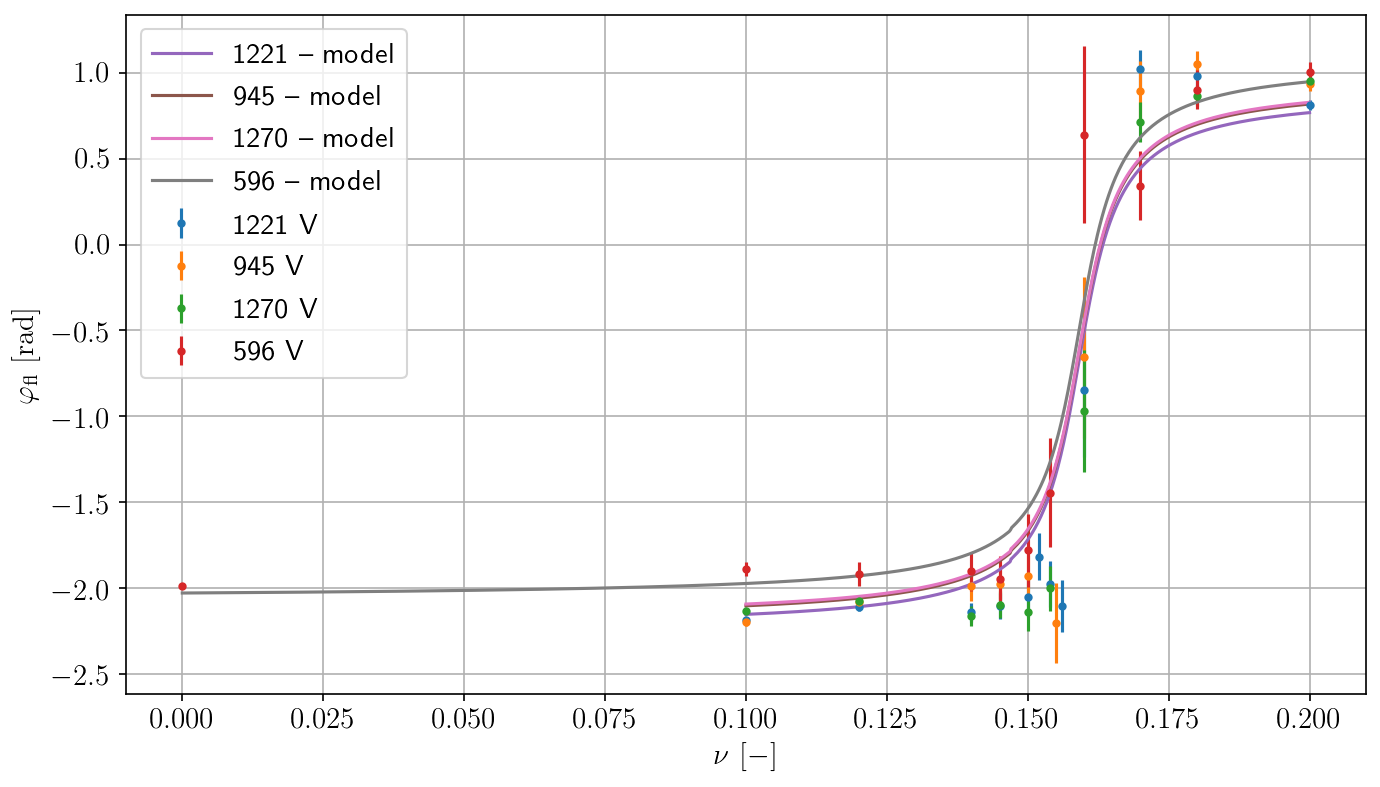

In [456]:
plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

x = plt.gca()

plt.errorbar(nu_1212, fot_phi_1212, yerr= fot_phi_sigma_1212, fmt='.', label=r'1221 V')
plt.errorbar(nu_945, fot_phi_945, yerr= fot_phi_sigma_945,  fmt='.', label=r'945 V')
plt.errorbar(nu_1270, fot_phi_1270, yerr= fot_phi_sigma_1270, fmt='.', label=r'1270 V')
plt.errorbar(nu_596, fot_phi_596, yerr= fot_phi_sigma_596,  fmt='.', label=r'596 V')
x.plot(nu_range, E_rf_phase_1+0.92, label=r'1221 -- model')
x.plot(nu_range, E_rf_phase_2+0.97, label=r'945 -- model')
x.plot(nu_range, E_rf_phase_3+0.98, label=r'1270 -- model')
x.plot(nu_range_596, E_rf_phase_4+1.10, label=r'596 -- model')


x.set_xlabel(r"$ \nu \, \, \rm [-]$")
x.set_ylabel(r"$ \varphi_{\rm fl} \, \, \rm [rad]$")

x.legend()
x.grid()

[240.63873515 240.63873515  31.5         31.5       ]
[142.53371213 142.53371213  17.88038191  21.28616894]
[221.52775915 221.52775915  27.78992336  33.0832421 ]


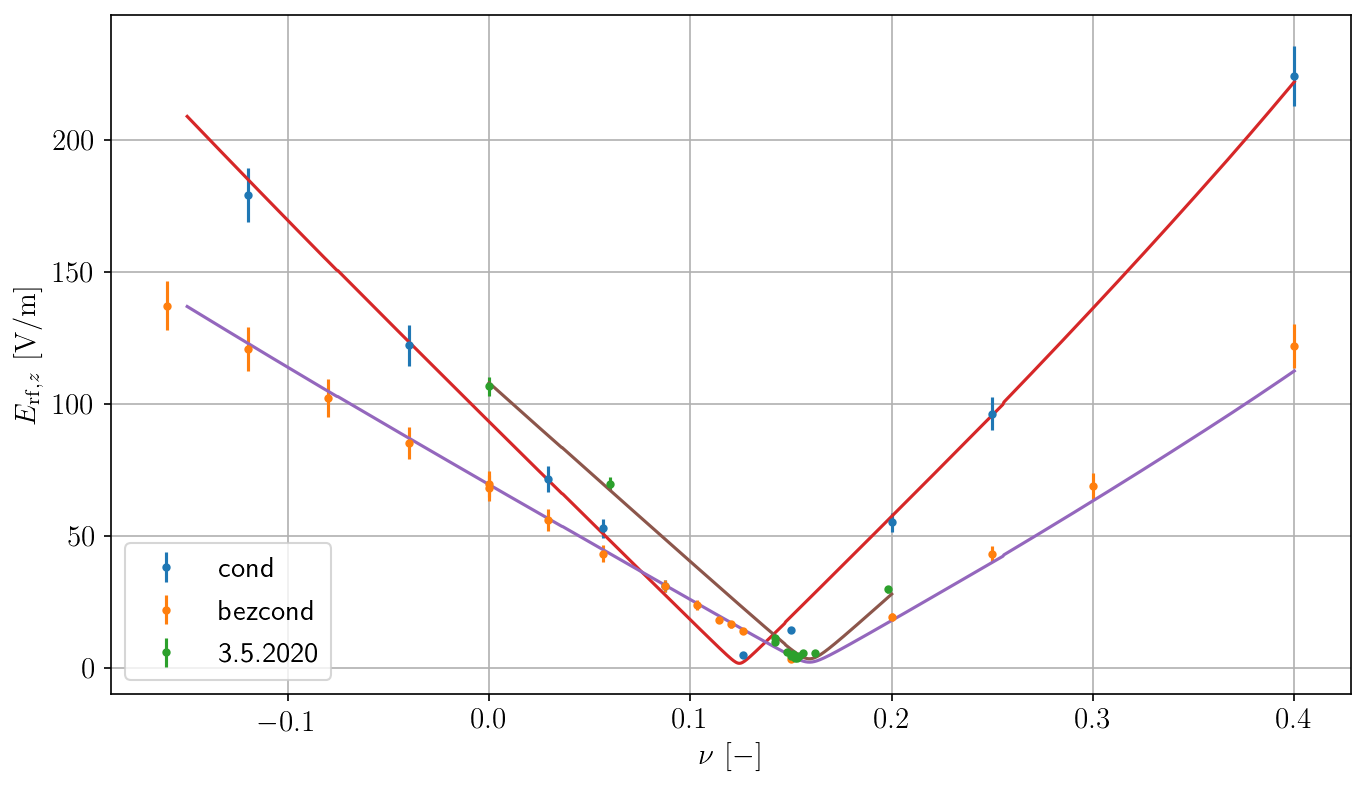

In [457]:
#---------- pro cond data:
# napeti a faze na elektrodach pasti
Vrf_1 = Vrf_radial_coef_cond * fit.x[1]
Vrf_3 = Vrf_radial_coef_cond * fit.x[1]
# Vrf_1 = Vrf_radial_coef_2
# Vrf_3 = Vrf_radial_coef_2
Vrf_5 = 31.5
Vrf_6 = 31.5 
# Vrf_5 = 1*fit.x[0] * Vrf_radial_coef_cond
# Vrf_6 = fit.x[0] * Vrf_radial_coef_cond
Vrf = np.array( [Vrf_1, Vrf_3, Vrf_5, Vrf_6] )
print(Vrf)
phi_2 = 0
# phi_56 = fit.x[3]
phi_56 = fit.x[2]
# phi_56 = 0.1

phi = np.array( [0, phi_2, phi_56] )

nu_range_cond = np.linspace(-0.15, 0.4, 1000)
E_rf_amp_cond = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_range_cond,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
E_rf_phase_cond = np.unwrap( E_rf_asym_phase_nu(Vrf, phi, delta_z_ax,nu_range_cond,
                                                   (E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) )
#---------- pro bezcond data:
# napeti a faze na elektrodach pasti
# Vrf_1 = fit.x[4]
# Vrf_3 = fit.x[4]
# Vrf_radial_coef_bezcond = 650/2
# Vrf_radial_coef_bezcond = fit.x[4]
Vrf_radial_coef_bezcond = fit.x[3]
Vrf_1 = Vrf_radial_coef_bezcond * fit.x[1]
Vrf_3 = Vrf_radial_coef_bezcond * fit.x[1]
# Vrf_5 = 17 
# Vrf_6 = 20 
Vrf_5 = 0.84*fit.x[0] * Vrf_radial_coef_bezcond
Vrf_6 = fit.x[0] * Vrf_radial_coef_bezcond
Vrf = np.array( [Vrf_1, Vrf_3, Vrf_5, Vrf_6] )
print(Vrf)
phi_2 = 0
# phi_56 = fit.x[3]
phi_56 = fit.x[2]
# phi_56 = 0.1

phi = np.array( [0, phi_2, phi_56] )

# nu_range_cond = np.linspace(-0.15, 0.4, 1000)
E_rf_amp_bezcond = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_range_cond,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
E_rf_phase_bezcond = np.unwrap( E_rf_asym_phase_nu(Vrf, phi, delta_z_ax,nu_range_cond,
                                                   (E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) )
#---------- pro 3.5.2020:
# napeti a faze na elektrodach pasti
# Vrf_1 = fit.x[4]
# Vrf_3 = fit.x[4]
# Vrf_radial_coef_bezcond = 650/2
# Vrf_radial_coef_3_5_20 = fit.x[5]
Vrf_radial_coef_3_5_20 = fit.x[4]
Vrf_1 = Vrf_radial_coef_3_5_20 * fit.x[1]
Vrf_3 = Vrf_radial_coef_3_5_20 * fit.x[1]
# Vrf_5 = 17 
# Vrf_6 = 20 
Vrf_5 = 0.84*fit.x[0] * Vrf_radial_coef_3_5_20
Vrf_6 = fit.x[0] * Vrf_radial_coef_3_5_20
Vrf = np.array( [Vrf_1, Vrf_3, Vrf_5, Vrf_6] )
print(Vrf)
phi_2 = 0
# phi_56 = fit.x[3]
phi_56 = fit.x[2]
# phi_56 = 0.1

phi = np.array( [0, phi_2, phi_56] )

nu_range_3_5_20 = np.linspace(0, 0.2, 1000)
E_rf_amp_3_5_20 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_range_3_5_20,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
E_rf_phase_3_5_20 = np.unwrap( E_rf_asym_phase_nu(Vrf, phi, delta_z_ax,nu_range_3_5_20,
                                                   (E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) )


# delta_z_ax = [-40, -40]
# delta_z_ax = [-80.84254716/2, -80.84254716/2]
# delta_z_ax = [-65.11076802/2, -65.11076802/2]
# exper_data_scale = fit.x[2]
# exper_data_scale = 1



my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.errorbar(nu_cond, exper_data_scale* E_rf_cond, yerr= exper_data_scale*E_rf_sigma_cond,  fmt='.', label=r'cond')
plt.errorbar(nu_bezcond, exper_data_scale* E_rf_bezcond, yerr= exper_data_scale*E_rf_sigma_bezcond,  fmt='.', label=r'bezcond')
plt.errorbar(nu_3_5_20, exper_data_scale* E_rf_3_5_20, yerr= exper_data_scale*E_rf_sigma_3_5_20,  fmt='.', label=r'3.5.2020')
plt.plot(nu_range_cond, E_rf_amp_cond)
plt.plot(nu_range_cond, E_rf_amp_bezcond)
plt.plot(nu_range_3_5_20, E_rf_amp_3_5_20)

plt.xlabel(r"$ \nu \, \, \rm [-]$")
plt.ylabel(r"$ E_{\rm rf, \it z} \, \, \rm [V/m]$")

plt.legend()
plt.grid()

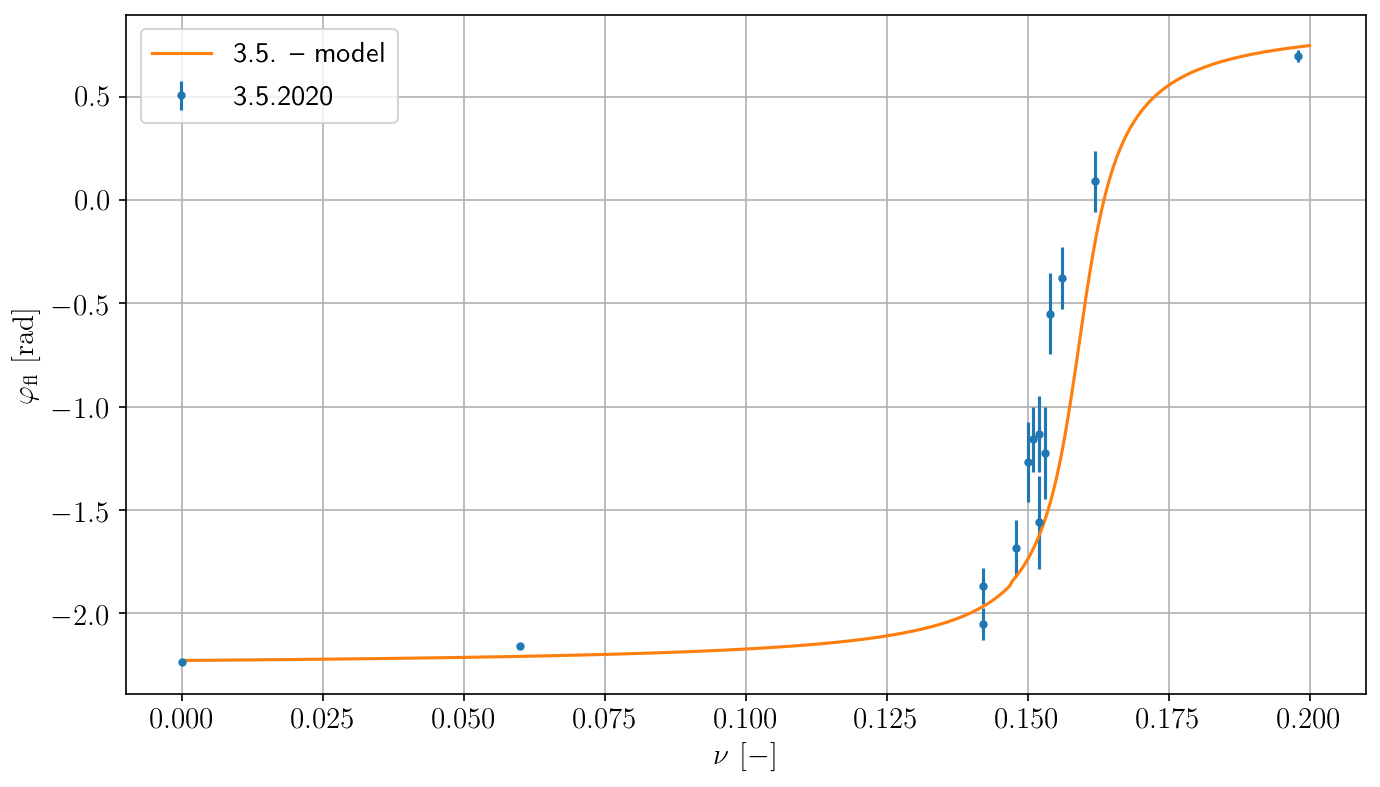

In [458]:
plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

x = plt.gca()

# plt.errorbar(nu_cond, fot_phi_cond, yerr= fot_phi_sigma_cond, fmt='.', label=r'cond')
# plt.errorbar(nu_bezcond, fot_phi_bezcond, yerr= fot_phi_sigma_bezcond,  fmt='.', label=r'bezcond')
plt.errorbar(nu_3_5_20, fot_phi_3_5_20, yerr= fot_phi_sigma_3_5_20, fmt='.', label=r'3.5.2020')
# x.plot(nu_range_cond, E_rf_phase_cond+0.60 - 2*np.pi, label=r'cond -- model')
# x.plot(nu_range_cond, E_rf_phase_bezcond+1.15 - 2*np.pi, label=r'bezcond -- model')
x.plot(nu_range_3_5_20, E_rf_phase_3_5_20+0.9, label=r'3.5. -- model')


x.set_xlabel(r"$ \nu \, \, \rm [-]$")
x.set_ylabel(r"$ \varphi_{\rm fl} \, \, \rm [rad]$")

x.legend()
x.grid()

## nejprve nafituju zavislost faze a pote zkusim aplitudy

In [459]:
# # # funkce vracejici residua
def fit_resid_E_phase_with_all_RF_voltages(x, nu_data_1,
                                         E_phase_data_1, weights,
                                         Vrf_radial_coef_1):
    # x = [Vrf_asym scale, Vrf_axial scale, delta ax sum ]
    
#     delta_z_ax = [x[2]/2, x[2]/2]
#     delta_z_ax = [x[0]/2, x[0]/2]
    delta_z_ax = [-43.05686478733233, -22.557869379268766]
    #----- data 1
    Vrf_5 = 0.84*6.03988235e-02 * Vrf_radial_coef_1
    Vrf_6 = 6.03988235e-02 * Vrf_radial_coef_1
    
#     Vrf = [Vrf_radial_coef_1 * 4.52660715e-01, Vrf_radial_coef_1*4.52660715e-01, Vrf_5, Vrf_6]
    Vrf = [Vrf_radial_coef_1 *4.04434849e-01, Vrf_radial_coef_1*4.04434849e-01, Vrf_5, Vrf_6]

    # fixni parametry
    phi_2 = 0
    phi_56 = x[1]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 1
#     E_rf_amp_resid_1 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_1,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_1
    E_rf_phase_resid_1 = np.unwrap( E_rf_asym_phase_nu(Vrf, phi, delta_z_ax,nu_data_1,
                                                   (E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) ) - E_phase_data_1 + x[2]
    #==============================
    
    
    return( np.sqrt(weights) * E_rf_phase_resid_1 )

# # # funkce vracejici residua
def fit_resid_E_phase_cond(x, nu_data_1,
                                         E_phase_data_1, weights,
                                         Vrf_radial_coef_1):
    # x = [Vrf_asym scale, Vrf_axial scale, delta ax sum ]
    
#     delta_z_ax = [x[2]/2, x[2]/2]
#     delta_z_ax = [x[0]/2, x[0]/2]
    delta_z_ax = [-43.05686478733233, -22.557869379268766]
    #----- data 1
    Vrf_5 = 1*6.03988235e-02 * Vrf_radial_coef_1
    Vrf_6 = 6.03988235e-02 * Vrf_radial_coef_1
    
#     Vrf = [Vrf_radial_coef_1 * 4.52660715e-01, Vrf_radial_coef_1*4.52660715e-01, Vrf_5, Vrf_6]
    Vrf = [Vrf_radial_coef_1 * 4.04434849e-01, Vrf_radial_coef_1*4.04434849e-01, Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[1]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 1
#     E_rf_amp_resid_1 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_1,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_1
    E_rf_phase_resid_1 = np.unwrap( E_rf_asym_phase_nu(Vrf, phi, delta_z_ax,nu_data_1,
                                                   (E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) ) - E_phase_data_1 + x[2]
    #==============================
    
    
    return( np.sqrt(weights) * E_rf_phase_resid_1 )

In [460]:
x0 = np.array( [-50, 0.0, 0.0] )
bbounds = ([-100, 0, 0],[0, 0.2, 2*np.pi] )

# x0 = np.array( [0.05, 0.3, -50, 0.0, 500, 400, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] )
# bbounds = ([0.001, 0.2,-200, 0, 100, 100, 0, 0, 0, 0, 0, 0],[0.15,10,0, 0.2, 1300, 1300, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2] )

Vrf_radial_coef_1 = 1221/2
Vrf_radial_coef_2 = 943/2
Vrf_radial_coef_3 = 1270/2
Vrf_radial_coef_4 = 594/2
Vrf_radial_coef_cond = 1190/2
Vrf_radial_coef_bezcond = 352.4
Vrf_radial_coef_3_5_20 = 547.7
# Vrf_radial_coef_1 = 1221
# Vrf_radial_coef_2 = 943
# Vrf_radial_coef_3 = 1270
# Vrf_radial_coef_4 = 594
# Vrf_radial_coef_cond = 1190
# Vrf_radial_coef_bezcond = 3.33843292e+02 * 2
# Vrf_radial_coef_3_5_20 = 5.19657732e+02 * 2

Vrf_radial_coef = [Vrf_radial_coef_1, Vrf_radial_coef_2, Vrf_radial_coef_3, Vrf_radial_coef_4, Vrf_radial_coef_cond, Vrf_radial_coef_bezcond, Vrf_radial_coef_3_5_20]
nu = [nu_1212, nu_945, nu_1270, nu_596, nu_cond, nu_bezcond, nu_3_5_20]
fot_phi = [fot_phi_1212, fot_phi_945, fot_phi_1270, fot_phi_596, fot_phi_cond, fot_phi_bezcond, fot_phi_3_5_20]
fot_phi_sigma = [fot_phi_sigma_1212, fot_phi_sigma_945, fot_phi_sigma_1270, fot_phi_sigma_596, fot_phi_sigma_cond, fot_phi_sigma_bezcond, fot_phi_sigma_3_5_20]

N_of_data_sets = len(Vrf_radial_coef)

x = np.zeros((3,N_of_data_sets))
opt = np.zeros(N_of_data_sets)

for i in range(N_of_data_sets):
    fit = least_squares(fit_resid_E_phase_with_all_RF_voltages, x0, args=(nu[i], fot_phi[i], 1/np.array(fot_phi_sigma[i])**2, Vrf_radial_coef[i]) , ftol=1e-10, xtol=1e-10,
                        bounds=bbounds)
    x[:,i] = fit.x
    opt[i] = fit.optimality

# pripad pro cond
fit = least_squares(fit_resid_E_phase_cond, x0, args=(nu[4], fot_phi[4], 1/np.array(fot_phi_sigma[4])**2, Vrf_radial_coef[4]) , ftol=1e-10, xtol=1e-10,
                        bounds=bbounds)
x[:,4] = fit.x
opt[4] = fit.optimality

    
phi_56_fit = x[1,:]    
print(opt)
print(x[1,:])

[0.00039505 0.00022225 0.00163888 0.00019831 0.00586635 0.11642077
 0.0002918 ]
[0.01499443 0.01452716 0.01575672 0.04301381 0.09932936 0.03276157
 0.08945489]


[246.90747531 246.90747531  30.97372467  36.87348175]
[190.6910313  190.6910313   23.92155804  28.47804528]
[256.81612911 256.81612911  32.21673245  38.35325292]
[120.11715015 120.11715015  15.06829849  17.93845058]
[240.63873515 240.63873515  35.93729998  35.93729998]
[142.52284079 142.52284079  17.87901814  21.2845454 ]
[221.5089668  221.5089668   27.78756593  33.08043563]


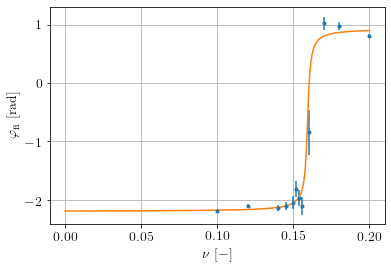

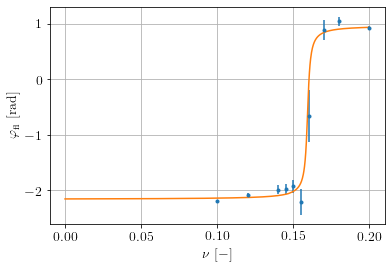

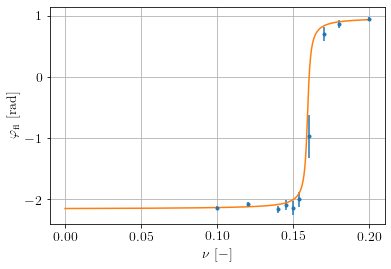

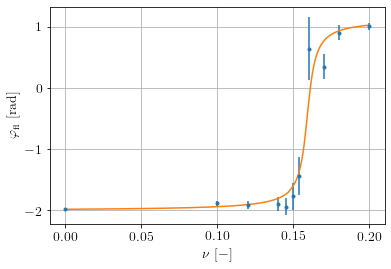

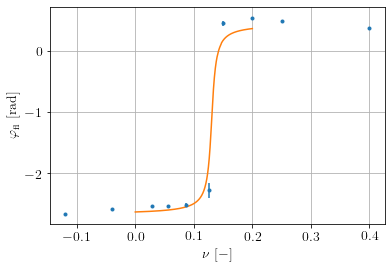

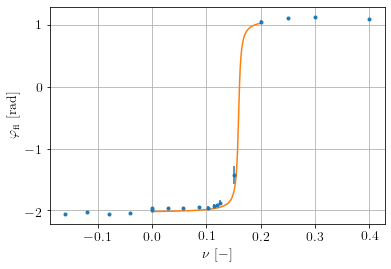

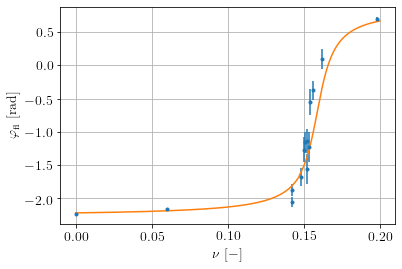

In [461]:
for i in range(N_of_data_sets):

#     delta_z_ax = [x[0,i]/2, x[0,i]/2]
    delta_z_ax = [-43.05686478733233, -22.557869379268766]
    # napeti a faze na elektrodach pasti
    Vrf_1 = Vrf_radial_coef[i] * 4.04434849e-01
    Vrf_3 = Vrf_radial_coef[i] * 4.04434849e-01
    # Vrf_1 = Vrf_radial_coef_1
    # Vrf_3 = Vrf_radial_coef_1 
    # Vrf_5 = 17 
    # Vrf_6 = 20 
    Vrf_5 = 0.84*6.03988235e-02 * Vrf_radial_coef[i] 
    Vrf_6 = 6.03988235e-02 * Vrf_radial_coef[i] 
    
    if i == 4:
        Vrf_5 = 1*6.03988235e-02 * Vrf_radial_coef[i]
        Vrf_6 = 6.03988235e-02 * Vrf_radial_coef[i]
    
    Vrf = np.array( [Vrf_1, Vrf_3, Vrf_5, Vrf_6] )
    print(Vrf)
    phi_2 = 0
    phi_56 = x[1,i]
    # phi_56 = 0.1

    phi = np.array( [0, phi_2, phi_56] )

    nu_range = np.linspace(0, 0.2, 1000)
#     E_rf_amp_1 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
    E_rf_phase_1 = np.unwrap( E_rf_asym_phase_nu(Vrf, phi, delta_z_ax,nu_range,
                                                       (E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) )

# plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
    plt.figure()
    ax = plt.gca()

    plt.errorbar(nu[i], fot_phi[i], yerr= fot_phi_sigma[i], fmt='.')
    ax.plot(nu_range, E_rf_phase_1+x[2,i])


    ax.set_xlabel(r"$ \nu \, \, \rm [-]$")
    ax.set_ylabel(r"$ \varphi_{\rm fl} \, \, \rm [rad]$")

#     x.legend()
    ax.grid()

In [471]:
# # # funkce vracejici residua
def fit_resid_E_amp_with_all_RF_voltages_fix_phi(x, nu_data_1, nu_data_2, nu_data_3, nu_data_4, nu_cond, nu_bezcond, nu_data_5,
                                         E_amp_data_1, E_amp_data_2, E_amp_data_3, E_amp_data_4, E_amp_data_cond, E_amp_data_bezcond, E_amp_data_5,
                                         Vrf_radial_coef_1, Vrf_radial_coef_2, Vrf_radial_coef_3, Vrf_radial_coef_4, Vrf_radial_coef_cond, phi_56_fix):
    # x = [Vrf_asym scale, Vrf_axial scale, delta ax sum ]
    
    delta_z_ax = [x[2]/2, x[2]/2]
    
    
    #----- data 1
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_1
    Vrf_6 = x[0] * Vrf_radial_coef_1
    
    Vrf = [Vrf_radial_coef_1 * x[1], Vrf_radial_coef_1*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = phi_56_fix[0]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 1
    E_rf_amp_resid_1 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_1,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_1
    #==============================
    
    #-------- data 2
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_2
    Vrf_6 = x[0] * Vrf_radial_coef_2
    
    Vrf = [Vrf_radial_coef_2*x[1], Vrf_radial_coef_2*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = phi_56_fix[1]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_2 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_2,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_2
    #==============================
    
    #-------- data 3
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_3
    Vrf_6 = x[0] * Vrf_radial_coef_3
    
    Vrf = [Vrf_radial_coef_3*x[1], Vrf_radial_coef_3*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = phi_56_fix[2]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_3 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_3,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_3
    #==============================
    
    #-------- data 4
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_4
    Vrf_6 = x[0] * Vrf_radial_coef_4
    
    Vrf = [Vrf_radial_coef_4*x[1], Vrf_radial_coef_4*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = phi_56_fix[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_4 = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_4,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_4
    #==============================
    
    #-------- data cond
    Vrf_5 = x[0] * Vrf_radial_coef_cond
    Vrf_6 = x[0] * Vrf_radial_coef_cond
    
    Vrf = [Vrf_radial_coef_cond*x[1], Vrf_radial_coef_cond*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = phi_56_fix[4]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_cond = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_cond,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_cond
    #==============================
    
    #-------- data bezcond
    Vrf_5 = 0.84* x[0] * x[3]
    Vrf_6 = x[0] * x[3]
    
    Vrf = [x[1]*x[3], x[1]*x[3], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = phi_56_fix[5]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_bezcond = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_bezcond,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_bezcond
    #==============================
    
    #-------- data 5.3.2020
    Vrf_5 = 0.84* x[0] * x[4]
    Vrf_6 = x[0] * x[4]
    
    Vrf = [x[1]*x[4], x[1]*x[4], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = phi_56_fix[6]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_5= E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_5,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_5
    #==============================
    
    
    return( np.concatenate((E_rf_amp_resid_1, E_rf_amp_resid_2, E_rf_amp_resid_3, E_rf_amp_resid_4, E_rf_amp_resid_cond, E_rf_amp_resid_bezcond, E_rf_amp_resid_5) ) )

# # # funkce vracejici residua
def fit_resid_E_amp_with_all_RF_voltages_fix_phi_weight(x, nu_data_1, nu_data_2, nu_data_3, nu_data_4, nu_cond, nu_bezcond, nu_data_5,
                                         E_amp_data_1, E_amp_data_2, E_amp_data_3, E_amp_data_4, E_amp_data_cond, E_amp_data_bezcond, E_amp_data_5,
                                                        weight_1, weight_2, weight_3, weight_4, weight_cond, weight_bezcond, weight_5,
                                         Vrf_radial_coef_1, Vrf_radial_coef_2, Vrf_radial_coef_3, Vrf_radial_coef_4, Vrf_radial_coef_cond, phi_56_fix):
    # x = [Vrf_asym scale, Vrf_axial scale, delta ax sum ]
    
    delta_z_ax = [x[4], x[5]]
#     delta_z_ax = [-43.05686478733233, -22.557869379268766]
    
    #----- data 1
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_1
    Vrf_6 = x[0] * Vrf_radial_coef_1
    
    Vrf = [Vrf_radial_coef_1 * x[1], Vrf_radial_coef_1*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = phi_56_fix[0]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 1
    E_rf_amp_resid_1 = np.sqrt(weight_1)* ( E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_1,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_1 )
    #==============================
    
    #-------- data 2
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_2
    Vrf_6 = x[0] * Vrf_radial_coef_2
    
    Vrf = [Vrf_radial_coef_2*x[1], Vrf_radial_coef_2*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = phi_56_fix[1]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_2 = np.sqrt(weight_2)*( E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_2,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_2 )
    #==============================
    
    #-------- data 3
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_3
    Vrf_6 = x[0] * Vrf_radial_coef_3
    
    Vrf = [Vrf_radial_coef_3*x[1], Vrf_radial_coef_3*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = phi_56_fix[2]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_3 = np.sqrt(weight_3)*( E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_3,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_3)
    #==============================
    
    #-------- data 4
    Vrf_5 = 0.84*x[0] * Vrf_radial_coef_4
    Vrf_6 = x[0] * Vrf_radial_coef_4
    
    Vrf = [Vrf_radial_coef_4*x[1], Vrf_radial_coef_4*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = phi_56_fix[3]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_4 = np.sqrt(weight_4)*( E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_4,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_4 )
    #==============================
    
    #-------- data cond
    Vrf_5 = x[0] * Vrf_radial_coef_cond
    Vrf_6 = x[0] * Vrf_radial_coef_cond
#     Vrf_5 = 31.5
#     Vrf_6 = 31.5
    
    Vrf = [Vrf_radial_coef_cond*x[1], Vrf_radial_coef_cond*x[1], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = phi_56_fix[4]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_cond = np.sqrt(weight_cond)*( E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_cond,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_cond)
    #==============================
    
    #-------- data bezcond
    Vrf_5 = 0.84* x[0] * x[2]
    Vrf_6 = x[0] * x[2]
    
    Vrf = [x[1]*x[2], x[1]*x[2], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = phi_56_fix[5]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_bezcond = np.sqrt(weight_bezcond)*( E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_bezcond,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_bezcond)
    #==============================
    
    #-------- data 5.3.2020
    Vrf_5 = 0.84* x[0] * x[3]
    Vrf_6 = x[0] * x[3]
    
    Vrf = [x[1]*x[3], x[1]*x[3], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = phi_56_fix[6]

    phi = np.array( [0, phi_2, phi_56] )
    
    #amplituda pro data 2
    E_rf_amp_resid_5 = np.sqrt(weight_5)*( E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data_5,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_5)
    #==============================
    
    
    return( np.concatenate((E_rf_amp_resid_1, E_rf_amp_resid_2, E_rf_amp_resid_3, E_rf_amp_resid_4, E_rf_amp_resid_cond, E_rf_amp_resid_bezcond, E_rf_amp_resid_5) ) )

In [473]:
from scipy.optimize import least_squares

# x0 = np.array( [0.08, 0.5, -50, 0.0] )
# bbounds = ([0.001, 0.2,-100, 0],[0.15,1,0, 2*np.pi] )

# x0 = np.array( [0.05, 0.3, -100, 0.0, 500] )
# bbounds = ([0.001, 0.2,-200, 0, 100],[0.15,10,0, 2*np.pi, 1300] )

# x0 = np.array( [0.05, 0.3, 500, 400] )
# bbounds = ([0.001, 0.2, 100, 100],[0.15,10, 1300, 1300] )
x0 = np.array( [0.05, 0.3, 500, 400, -43.06, -22.56] )
bbounds = ([0.001, 0.2, 100, 100, -44, -23],[0.15,10, 1300, 1300, -43, -22] )

# x0 = np.array( [0.05, 0.3, -50, 0.0, 500, 400, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] )
# bbounds = ([0.001, 0.2,-200, 0, 100, 100, 0, 0, 0, 0, 0, 0],[0.15,10,0, 0.2, 1300, 1300, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2] )

Vrf_radial_coef_1 = 1221/2
Vrf_radial_coef_2 = 943/2
Vrf_radial_coef_3 = 1270/2
Vrf_radial_coef_4 = 594/2
Vrf_radial_coef_cond = 1190/2

E_rf_sigma = np.array([E_rf_sigma_1212, E_rf_sigma_945, E_rf_sigma_1270, E_rf_sigma_596, E_rf_sigma_cond, E_rf_sigma_bezcond, E_rf_sigma_3_5_20])
weights = 1/E_rf_sigma**2

fit = least_squares(fit_resid_E_amp_with_all_RF_voltages_fix_phi_weight, x0, args=(nu_1212, nu_945, nu_1270, nu_596, nu_cond, nu_bezcond, nu_3_5_20, 
                                                                                   E_rf_1212, E_rf_945, E_rf_1270, E_rf_596, E_rf_cond, E_rf_bezcond, E_rf_3_5_20, 
                                                                                   weights[0], weights[1], weights[2], weights[3], weights[4] , weights[5], weights[6],
                                                                                   Vrf_radial_coef_1, Vrf_radial_coef_2, Vrf_radial_coef_3, Vrf_radial_coef_4, Vrf_radial_coef_cond, 
                                                                                   phi_56_fit) , ftol=1e-10, xtol=1e-10, bounds=bbounds)
# nejistoty parametru
jac = fit.jac
weights_vec = []
for i in range(len(weights)):
    for j in range(len(weights[i])):
        weights_vec.append(weights[i][j])


C = np.linalg.inv( np.transpose(jac) @ np.diag(weights_vec) @ jac )
sigmas_params = np.sqrt( np.diagonal(C) )


# fit = least_squares(fit_resid_E_amp_with_all_RF_voltages_fix_phi, x0, args=(nu_1212, nu_945, nu_1270, nu_596, nu_cond, nu_bezcond, nu_3_5_20, E_rf_1212, E_rf_945, E_rf_1270, E_rf_596, E_rf_cond, E_rf_bezcond, E_rf_3_5_20, Vrf_radial_coef_1, Vrf_radial_coef_2, Vrf_radial_coef_3, Vrf_radial_coef_4, Vrf_radial_coef_cond, phi_56_fit) , ftol=1e-10, xtol=1e-10,
#                     bounds=bbounds)

print(fit.optimality)
print(fit.x)
print(sigmas_params)
# fit

0.020738010092197293
[ 6.34787988e-02  4.28082251e-01  3.28492736e+02  4.73493418e+02
 -4.34665041e+01 -2.28337142e+01]
[2.19673751e-03 5.87922559e-03 1.25620860e+01 1.46013941e+01
 1.70278934e+00 1.75649455e+00]


[261.34421433 261.34421433  32.55319762  38.75380669]
[3.5892672224199775, 3.5892672224199775, 1.341108247639935, 1.341108247639935]
[201.84078142 201.84078142  25.14141307  29.93025365]
[2.772054865472595, 2.772054865472595, 1.035761734254266, 1.035761734254266]
[271.83222948 271.83222948  33.8595913   40.30903726]
[3.7333082493639407, 3.7333082493639407, 1.3949283165460422, 1.3949283165460422]
[127.14042859 127.14042859  15.83669073  18.85320325]
[1.7461300000962052, 1.7461300000962052, 0.6524310393924009, 0.6524310393924009]
[254.70893943 254.70893943  37.76988531  37.76988531]
[3.49813922578196, 3.49813922578196, 1.3070588162911734, 1.3070588162911734]
[150.85618531 150.85618531  18.79074012  22.36992871]
[2.0718390977572483, 2.0718390977572483, 0.7741302972453941, 0.7741302972453941]
[234.46064895 234.46064895  29.20456402  34.76733812]
[3.2200518553962683, 3.2200518553962683, 1.203153132239791, 1.203153132239791]


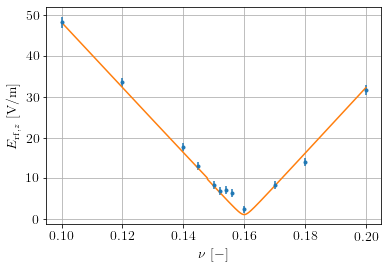

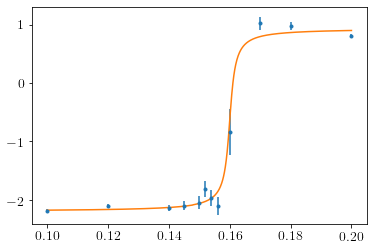

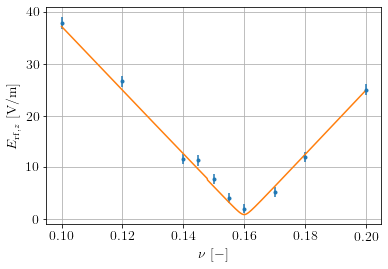

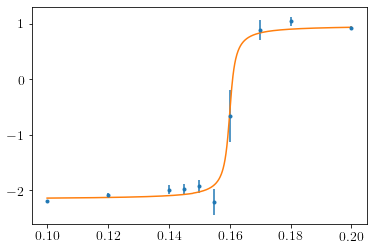

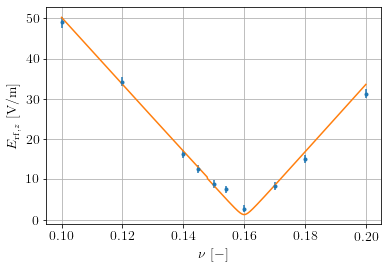

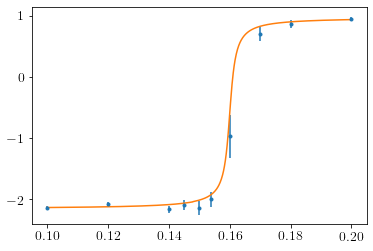

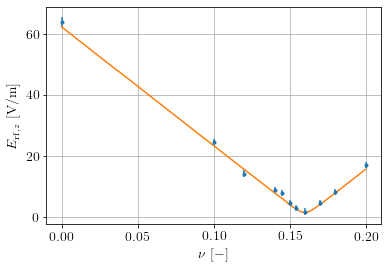

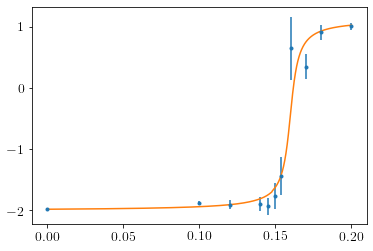

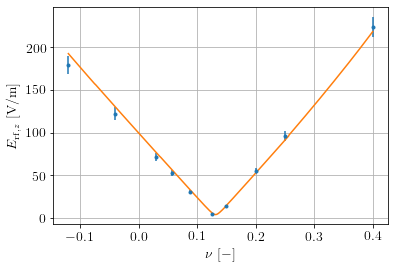

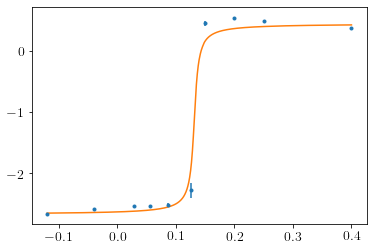

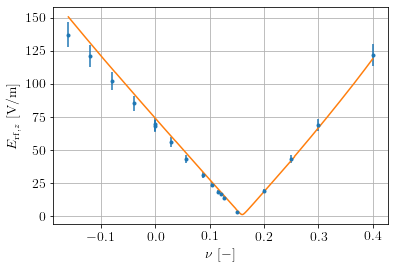

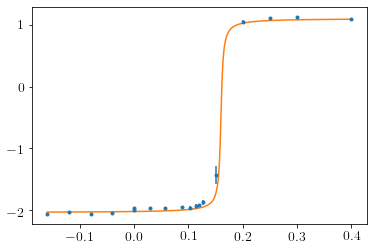

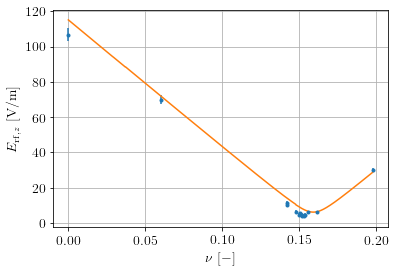

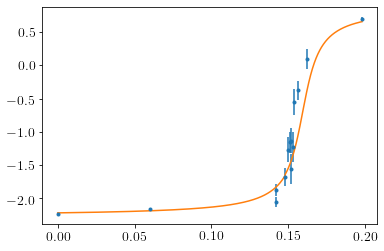

In [476]:
delta_z_ax = [fit.x[4], fit.x[5]]
# delta_z_ax = [-43.05686478733233, -22.557869379268766]
E_rf = [E_rf_1212, E_rf_945, E_rf_1270, E_rf_596, E_rf_cond, E_rf_bezcond, E_rf_3_5_20]

for i in range(7):
    # napeti a faze na elektrodach pasti
    Vrf_1 = Vrf_radial_coef[i] * fit.x[1]
    Vrf_3 = Vrf_radial_coef[i] * fit.x[1]
    # Vrf_1 = Vrf_radial_coef_1
    # Vrf_3 = Vrf_radial_coef_1 
    # Vrf_5 = 17 
    # Vrf_6 = 20 
    Vrf_5 = 0.84*fit.x[0] * Vrf_radial_coef[i]
    Vrf_6 = fit.x[0] * Vrf_radial_coef[i]
    
    if i == 4:
        Vrf_5 = 1*fit.x[0] * Vrf_radial_coef[i]
        Vrf_6 = fit.x[0] * Vrf_radial_coef[i]
#         Vrf_5 = 31.5
#         Vrf_6 = 31.5
    
    Vrf = np.array( [Vrf_1, Vrf_3, Vrf_5, Vrf_6] )
    print(Vrf)
    print([Vrf_radial_coef[i] * sigmas_params[1],Vrf_radial_coef[i] * sigmas_params[1], sigmas_params[0]* Vrf_radial_coef[i], sigmas_params[0]* Vrf_radial_coef[i] ])
    phi_2 = 0
    phi_56 = phi_56_fit[i]
    # phi_56 = 0.1

    phi = np.array( [0, phi_2, phi_56] )

    nu_range = np.linspace(np.min(nu[i]), np.max(nu[i]), 1000)
    E_rf_amp = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
    E_rf_phase = np.unwrap( E_rf_asym_phase_nu(Vrf, phi, delta_z_ax,nu_range,
                                                       (E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) )


    
    # delta_z_ax = [-40, -40]
    # delta_z_ax = [-80.84254716/2, -80.84254716/2]
    # delta_z_ax = [-65.11076802/2, -65.11076802/2]
    # exper_data_scale = fit.x[2]
    exper_data_scale = 1



#     my_dpi = 150
#     siz = 100
#     sizex = 16*siz
#     sizey = 9*siz

#     plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
    plt.figure()
    plt.errorbar(nu[i], exper_data_scale* E_rf[i], yerr= exper_data_scale*E_rf_sigma[i],  fmt='.')
    plt.plot(nu_range, E_rf_amp)
    # plt.plot(nu_range_cond, E_rf_amp_cond)
    # plt.plot(nu_range_cond, E_rf_amp_bezcond)
    # plt.plot(nu_range_3_5_20, E_rf_amp_3_5_20)

    plt.xlabel(r"$ \nu \, \, \rm [-]$")
    plt.ylabel(r"$ E_{\rm rf, \it z} \, \, \rm [V/m]$")

#     plt.legend()
    plt.grid()
    
    plt.figure()
    plt.errorbar(nu[i], fot_phi[i], yerr= fot_phi_sigma[i],  fmt='.')
    if (i==4) or (i==5):
        plt.plot(nu_range, E_rf_phase+x[2,i] - 2*np.pi)
    else:
        plt.plot(nu_range, E_rf_phase+x[2,i])

# EMM v ose $x$

ve fitu vyse uplne zanedbavam mozny fazovy posuv mezi radialnimi elektrodami, ten by mel byt zjistitelny v prubehu EMM v ose $x$

In [23]:
# data import z 10.3.2020 
#import pandas as pd
import numpy as np

#data_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_delim.txt", sep="\t").values
#voltages_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_voltages.txt", sep="\t").values

data_p1 = np.genfromtxt("09_05_20_EMM_min_xz_overeni_delim.txt", delimiter="\t")[:,:-1]
voltages_p1 = np.genfromtxt("09_05_20_EMM_min_xz_overeni_voltages.txt", delimiter="\t")

fotkor = data_p1
voltages = voltages_p1

# pomocne promene
fotkor_shape = np.shape(fotkor)

# parametry odecitani foton-korelacnich dat
t_res = 256e-12  # casove rozliseni histogramu v s
t_measure = [95, 115, 120, 115, 60, 250] # doba nacitani dat v s

# casova skala foton-kor. dat
t_scale = np.array( range(0,fotkor_shape[0]) ) *t_res

#---------- background fotony
background_photocounts = [110, 110, 130, 130, 130, 130] # ph/s  tyto fotony jsou rovnomerne rozdeleny v prubehu RF periody
# ------------------------------
photon_sum = np.sum(fotkor, axis=0) - np.array(t_measure) * np.array(background_photocounts)

hist_sigma = 0.09088658 * np.sqrt( photon_sum )

#------fit 
from EMM_min_func import get_hist_fit

DeltaS_S_ratio, Delta_S_S_ratio_sigma, fot_phi, fot_phi_sigma, x, Omega, Omega_sigma, nu, t_scale = get_hist_fit(fotkor, 
                                                                                                    voltages, t_res, t_measure, 
                                                                                                    background_photocounts, hist_sigma, 
                                                                                                       sign_DeltaS=False, phi0=3.8)
print(DeltaS_S_ratio)
print(fot_phi)

[0.63295282 0.08203045 0.01106955 0.0085989  0.02170279 0.01155751]
[0.796693329109518, 1.022335484659399, -2.191969830214546, 1.1554352514163038, 0.9774459763123045, 1.2705591711456912]


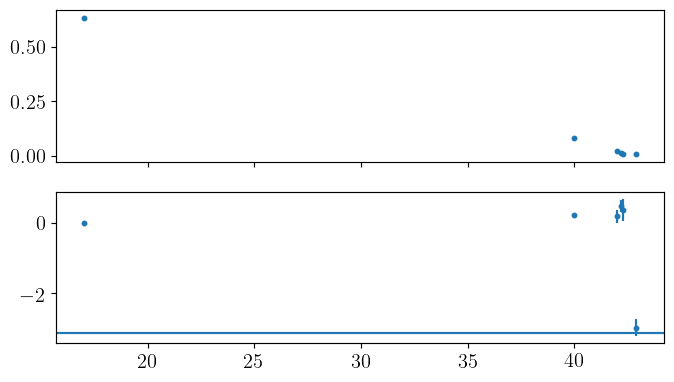

In [35]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(0.7*sizex/my_dpi, 0.7*sizey/my_dpi), dpi=0.7*my_dpi)

ax1.errorbar(voltages[:,2], DeltaS_S_ratio, fmt='.', yerr=Delta_S_S_ratio_sigma)
ax2.errorbar(voltages[:,2], fot_phi - fot_phi[0], fmt='.', yerr=fot_phi_sigma)
ax2.axhline(-np.pi)

stejny graf musim videt jen v ose $x$

In [39]:
DeltaS_S_min_z = 0.017303779507044637
fot_phi_min_z = 0.5404356121494758

def get_beta_x(variables):
    #input: beta = [beta_z, beta_xz, beta_xy]  variables = [beta, fot_phi, gamma]
    #       fot_phi = [phi_z, phi_xz, phi_xy]
    beta = variables[:3]
    fot_phi = variables[3:6]
    gamma = variables[6]
    a = variables[7]
    c = variables[8]
    b = -np.sqrt(1 - c**2 - a**2)  # zde pozor na znamenko, je treba ho zadat rucne
    
    beta_x_comp = 1/np.sin(gamma) * (beta[1]*np.exp(1j*fot_phi[1]) - beta[0]*np.cos(gamma)*np.exp(1j*fot_phi[0]) )
    return( np.abs(beta_x_comp) )

def get_phi_x(variables):
    #input: beta = [beta_z, beta_xz, beta_xy]  variables = [beta, fot_phi, gamma]
    #       fot_phi = [phi_z, phi_xz, phi_xy]
    beta = variables[:3]
    fot_phi = variables[3:6]
    gamma = variables[6]
    a = variables[7]
    c = variables[8]
    b = -np.sqrt(1 - c**2 - a**2)  # zde pozor na znamenko, je treba ho zadat rucne
    
    beta_x_comp = 1/np.sin(gamma) * (beta[1]*np.exp(1j*fot_phi[1]) - beta[0]*np.cos(gamma)*np.exp(1j*fot_phi[0]) )
    return( np.angle(beta_x_comp) )

get_beta_x([DeltaS_S_min_z, DeltaS_S_ratio[0], 0, fot_phi_min_z, fot_phi[0], 0, np.pi/4, 0,0])

0.8784026887638934

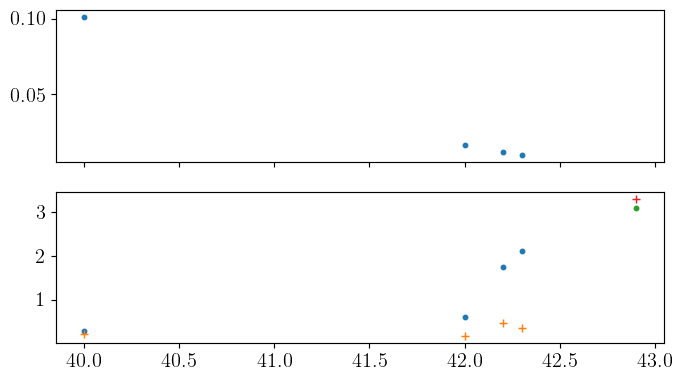

In [59]:
DeltaS_S_ratio_x = np.zeros(len(DeltaS_S_ratio))
fot_phi_x = np.zeros(len(fot_phi))

for i in range(len(DeltaS_S_ratio)):
    DeltaS_S_ratio_x[i] = get_beta_x([DeltaS_S_min_z, DeltaS_S_ratio[i], 0, fot_phi_min_z, fot_phi[i], 0, np.pi/4, 0,0])
    fot_phi_x[i] = get_phi_x([DeltaS_S_min_z, DeltaS_S_ratio[i], 0, fot_phi_min_z, fot_phi[i], 0, np.pi/4, 0,0])
    
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(0.7*sizex/my_dpi, 0.7*sizey/my_dpi), dpi=0.7*my_dpi)

ax1.plot(voltages[[1,3,4,5],2], DeltaS_S_ratio_x[[1,3,4,5]], '.')
ax2.plot(voltages[[1,3,4,5],2], fot_phi_x[[1,3,4,5]] - fot_phi_x[0], '.')
ax2.plot(voltages[[1,3,4,5],2], np.array(fot_phi)[[1,3,4,5]] - fot_phi[0], '+')

ax2.plot(voltages[2,2], fot_phi_x[2] - fot_phi_x[0] + 2*np.pi, '.')
ax2.plot(voltages[2,2], np.array(fot_phi)[[2]] - fot_phi[0] + 2*np.pi, '+')
# ax2.axhline(-np.pi)